# check how the results are looking from decontX

In [29]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

decontx = sc.read_h5ad("12_decontX_results_no_clusters/decontx_ED_bg_nothresh.h5ad")
background = sc.read_h5ad("00_data/background.h5ad")
foreground = sc.read_h5ad("00_data/foreground.h5ad")
raw = sc.read_10x_h5("00_data/raw.h5")

In [30]:
# print shapes for all loaded data
print("decontx: ", decontx.shape)
print("background: ", background.shape)
print("raw: ", raw.shape)
print("foreground: ", foreground.shape)


decontx:  (12315, 61313)
background:  (710116, 22040)
raw:  (722431, 22040)
foreground:  (12315, 22040)


In [31]:
decontx.var

ID  \
ENSSSCG00000028996                  ENSSSCG00000028996   
ENSSSCG00000005267                  ENSSSCG00000005267   
ENSSSCG00000005268                  ENSSSCG00000005268   
ENSSSCG00000005269                  ENSSSCG00000005269   
ENSSSCG00000031382                  ENSSSCG00000031382   
...                                                ...   
AEMK02000695.1:5684-6622      AEMK02000695.1:5684-6622   
AEMK02000695.1:9057-10022    AEMK02000695.1:9057-10022   
AEMK02000695.1:11026-11857  AEMK02000695.1:11026-11857   
AEMK02000695.1:12452-13162  AEMK02000695.1:12452-13162   
AEMK02000695.1:13456-14318  AEMK02000695.1:13456-14318   

                                                Symbol             Type  
ENSSSCG00000028996                             ALDH1A1  Gene Expression  
ENSSSCG00000005267                               ANXA1  Gene Expression  
ENSSSCG00000005268                                RORB  Gene Expression  
ENSSSCG00000005269                               TRPM6  Gene Expression  
ENSSSCG00000031382                             C9orf40  Gene Expression  
...                                                ...              ...  
AEMK02000695.1:5684-6622      AEMK02000695.1:5684-6622            Peaks  
AEMK02000695.1:9057-10022    AEMK02000695.1:9057-10022            Peaks  
AEMK02000695.1:11026-11857  AEMK02000695.1:11026-11857            Peaks  
AEMK02000695.1:12452-13162  AEMK02000695.1:12452-13162            Peaks  
AEMK02000695.1:13456-14318  AEMK02000695.1:13456-14318            Peaks  

[61313 rows x 3 columns]

In [32]:
# filter for gene expression
decontx_gene_exp = decontx[:, decontx.var['Type'] == 'Gene Expression']
decontx_gene_exp

# i only got Pig Ensembl IDs starting with ENSSSCG
# so I do it like this

type_col = "Type" if "Type" in decontx.var.columns else None
if type_col is not None:
    decontx = decontx[:, decontx.var[type_col] == "Gene Expression"].copy()

# Use gene symbols as var_names
if "Symbol" in decontx.var.columns:
    symbols = decontx.var["Symbol"].astype(str).values
    # Fallback for missing/empty symbols
    mask = (symbols == "") | pd.isna(symbols)
    if mask.any():
        symbols[mask] = decontx.var_names[mask]
    decontx.var_names = symbols
    decontx.var_names_make_unique()


In [33]:
print(decontx.var_names)
print(decontx_gene_exp.var_names)

# so decontx is what we wanted to achieve by changing the Ensembl IDs to gene symbols

Index(['ALDH1A1', 'ANXA1', 'RORB', 'TRPM6', 'C9orf40', 'CARNMT1', 'NMRK1',
       'OSTF1', 'ENSSSCG00000045514', 'PCSK5',
       ...
       'ATP8', 'ATP6', 'COX3', 'ND3', 'ND4L', 'ND4', 'ND5', 'ND6', 'CYTB',
       'ENSSSCG00000034846'],
      dtype='object', length=22040)
Index(['ENSSSCG00000028996', 'ENSSSCG00000005267', 'ENSSSCG00000005268',
       'ENSSSCG00000005269', 'ENSSSCG00000031382', 'ENSSSCG00000005271',
       'ENSSSCG00000005272', 'ENSSSCG00000005273', 'ENSSSCG00000045514',
       'ENSSSCG00000023520',
       ...
       'ENSSSCG00000018080', 'ENSSSCG00000018081', 'ENSSSCG00000018082',
       'ENSSSCG00000018084', 'ENSSSCG00000018086', 'ENSSSCG00000018087',
       'ENSSSCG00000018091', 'ENSSSCG00000018092', 'ENSSSCG00000018094',
       'ENSSSCG00000034846'],
      dtype='object', length=22040)


In [34]:
# 3) Optional: drop near-unexpressed genes
#sc.pp.filter_genes(adata, min_cells=3)

In [35]:
# save the new decontx_gene_exp to a h5ad file
decontx.write_h5ad("12_results_no_clusters/decontx_trimmed_gex.h5ad")

FileNotFoundError: [Errno 2] Unable to synchronously create file (unable to open file: name = '12_results_no_clusters/decontx_trimmed_gex.h5ad', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 602)

# simple GSEA

Original shape: (12315, 22040)
Final shape: (12315, 22040)
Generated UMAP with minimal preprocessing


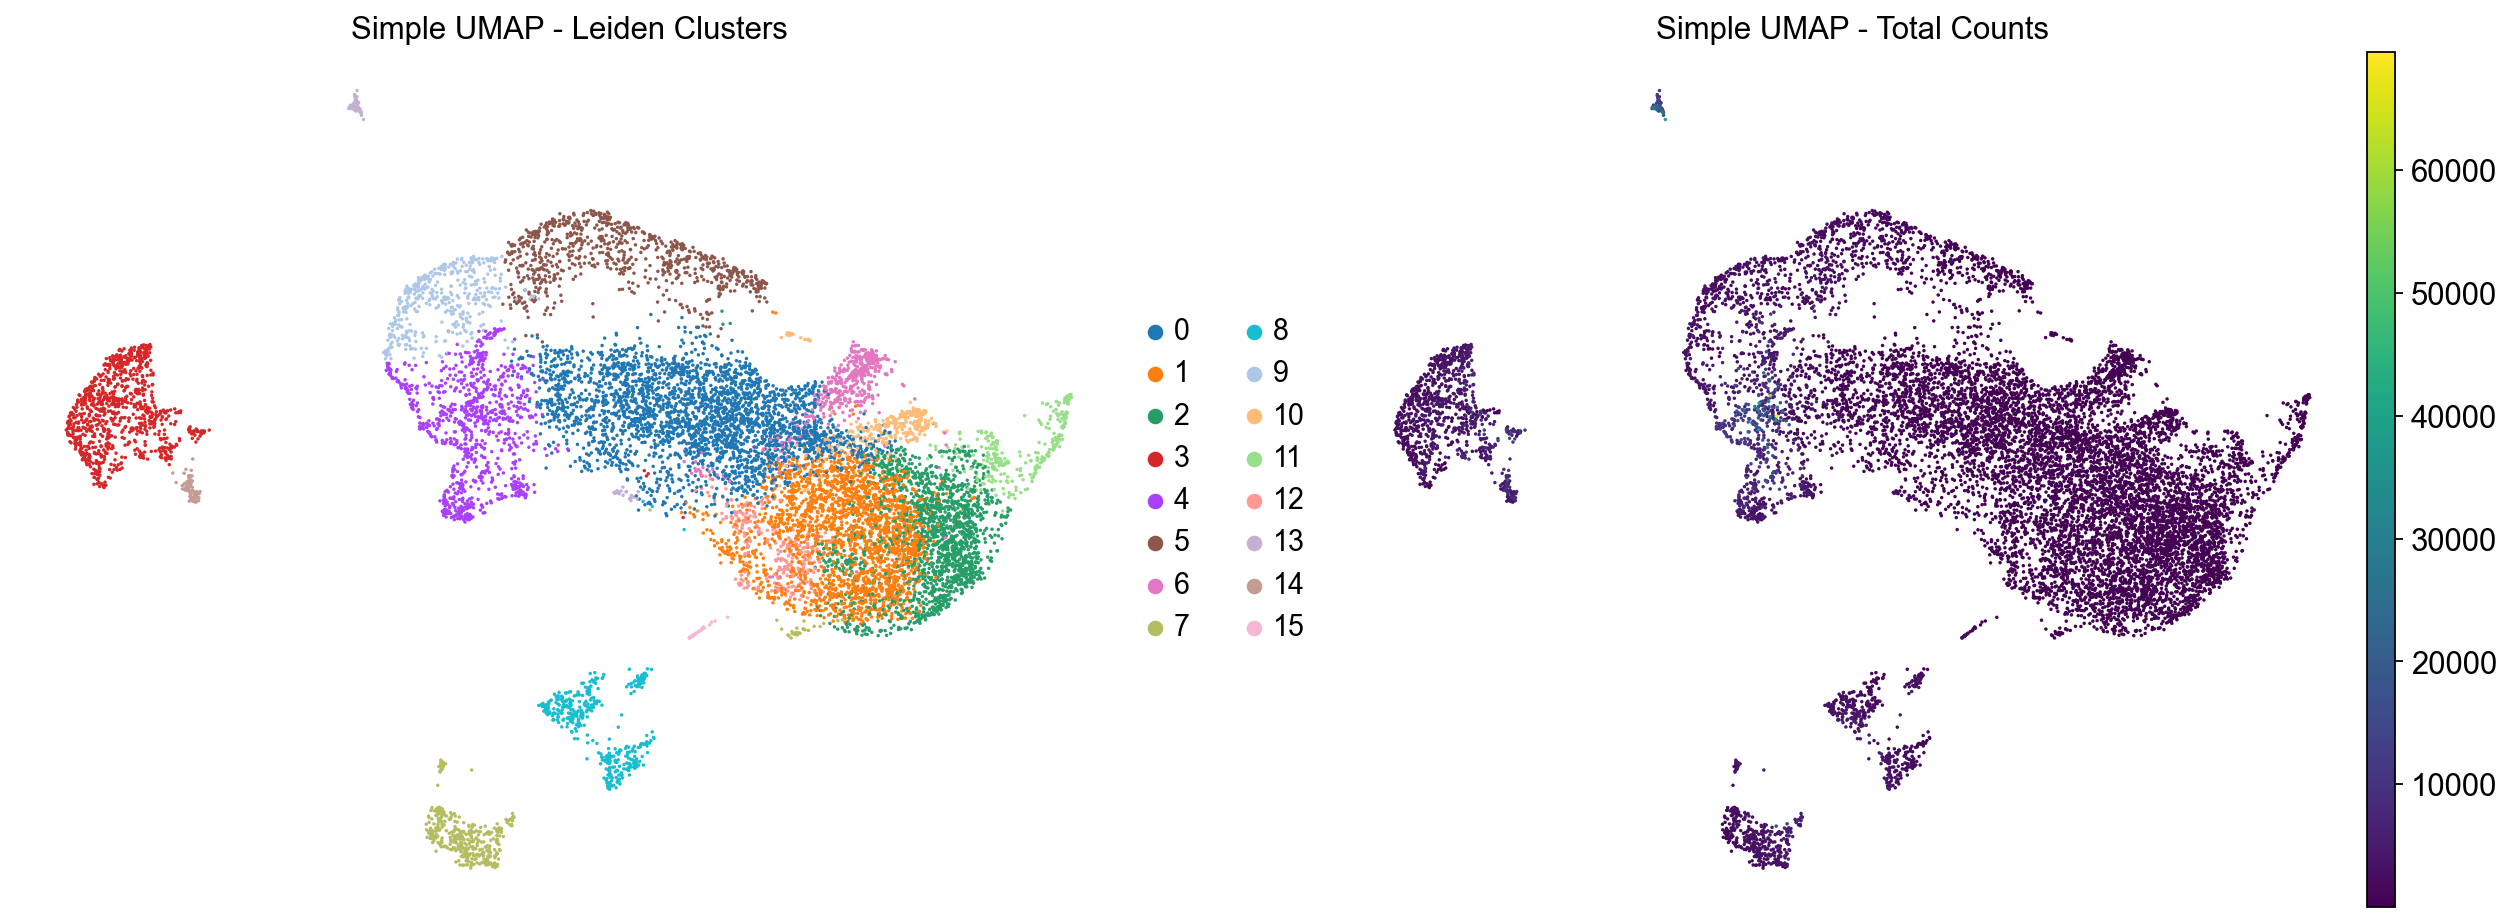


Available obs columns: ['Sample', 'Barcode', 'decontX_contamination', 'decontX_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden']


In [6]:
import scanpy as sc
import matplotlib.pyplot as plt
# Simple UMAP for CellBender data - minimal preprocessing
simple_adata = sc.read_h5ad('/Users/oskarhaupt/Documents/DE/2024_FU-Bachelor/WS-24-25/Charité/05_sorted/11_decontX/12_decontX_results_no_clusters/decontx_trimmed_gex.h5ad')

print(f"Original shape: {simple_adata.shape}")

# Minimal QC - just remove obvious empty cells
sc.pp.calculate_qc_metrics(simple_adata, inplace=True)

# Very basic filtering (optional - comment out if you want truly raw)
# sc.pp.filter_cells(simple_adata, min_genes=200)
# sc.pp.filter_genes(simple_adata, min_cells=3)

# Basic normalization
sc.pp.normalize_total(simple_adata, target_sum=1e4)
sc.pp.log1p(simple_adata)

# Use all genes or top variable genes (uncomment one approach)
# Option 1: Use ALL genes
sc.pp.pca(simple_adata, n_comps=50, use_highly_variable=False)

# Option 2: Select HVGs (less aggressive than your pipeline)
#sc.pp.highly_variable_genes(simple_adata, n_top_genes=3000)
#sc.pp.pca(simple_adata, n_comps=50)

# Generate UMAP
sc.pp.neighbors(simple_adata, n_neighbors=15, n_pcs=30)
sc.tl.umap(simple_adata, min_dist=0.3)

# Optional: add leiden clustering for coloring
sc.tl.leiden(simple_adata, resolution=0.5)

print(f"Final shape: {simple_adata.shape}")
print(f"Generated UMAP with minimal preprocessing")

# Visualize simple UMAP
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Color by leiden clusters
sc.pl.umap(simple_adata, color='leiden', ax=axes[0], show=False, title='Simple UMAP - Leiden Clusters')

# Color by total counts (QC metric)
sc.pl.umap(simple_adata, color='total_counts', ax=axes[1], show=False, title='Simple UMAP - Total Counts')

plt.tight_layout()
plt.show()

# Also check some marker genes if available
print("\nAvailable obs columns:", list(simple_adata.obs.columns))

In [ ]:
# Optional: Check key spermatogenesis markers on simple UMAP
marker_genes = ['DMRT1', 'STRA8', 'SYCP1', 'SYCP3', 'PRM1', 'PRM2', 'TNP1', 'ACRV1']
available_markers = [gene for gene in marker_genes if gene in simple_adata.var_names]

print(f"Available markers: {available_markers}")

if len(available_markers) > 0:
    sc.pl.umap(simple_adata, color=available_markers, ncols=4, cmap='viridis')


Available markers: ['DMRT1', 'STRA8', 'SYCP1', 'SYCP3', 'PRM1', 'PRM2', 'TNP1', 'ACRV1']


# big GSEA

In [1]:
import sys
sys.path.insert(1, '/Users/oskarhaupt/Documents/DE/2024_FU-Bachelor/WS-24-25/Charité/05_sorted/GSEA_new')
from gene_pathway_analysis import SpermatogenesisAnalyzer # main file for GSEA analysis. creates h5ad file with GSEA processed data

/Users/oskarhaupt/Library/Python/3.9/lib/python/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


Output directory created: GSEA_20251020_231531
Defined 29 trajectory markers of germ cells (5 categories)
Cell type markers: 62 total including leydig/sertoli etc
Original data shape: (12315, 22040)
Data loaded and QC metrics calculated


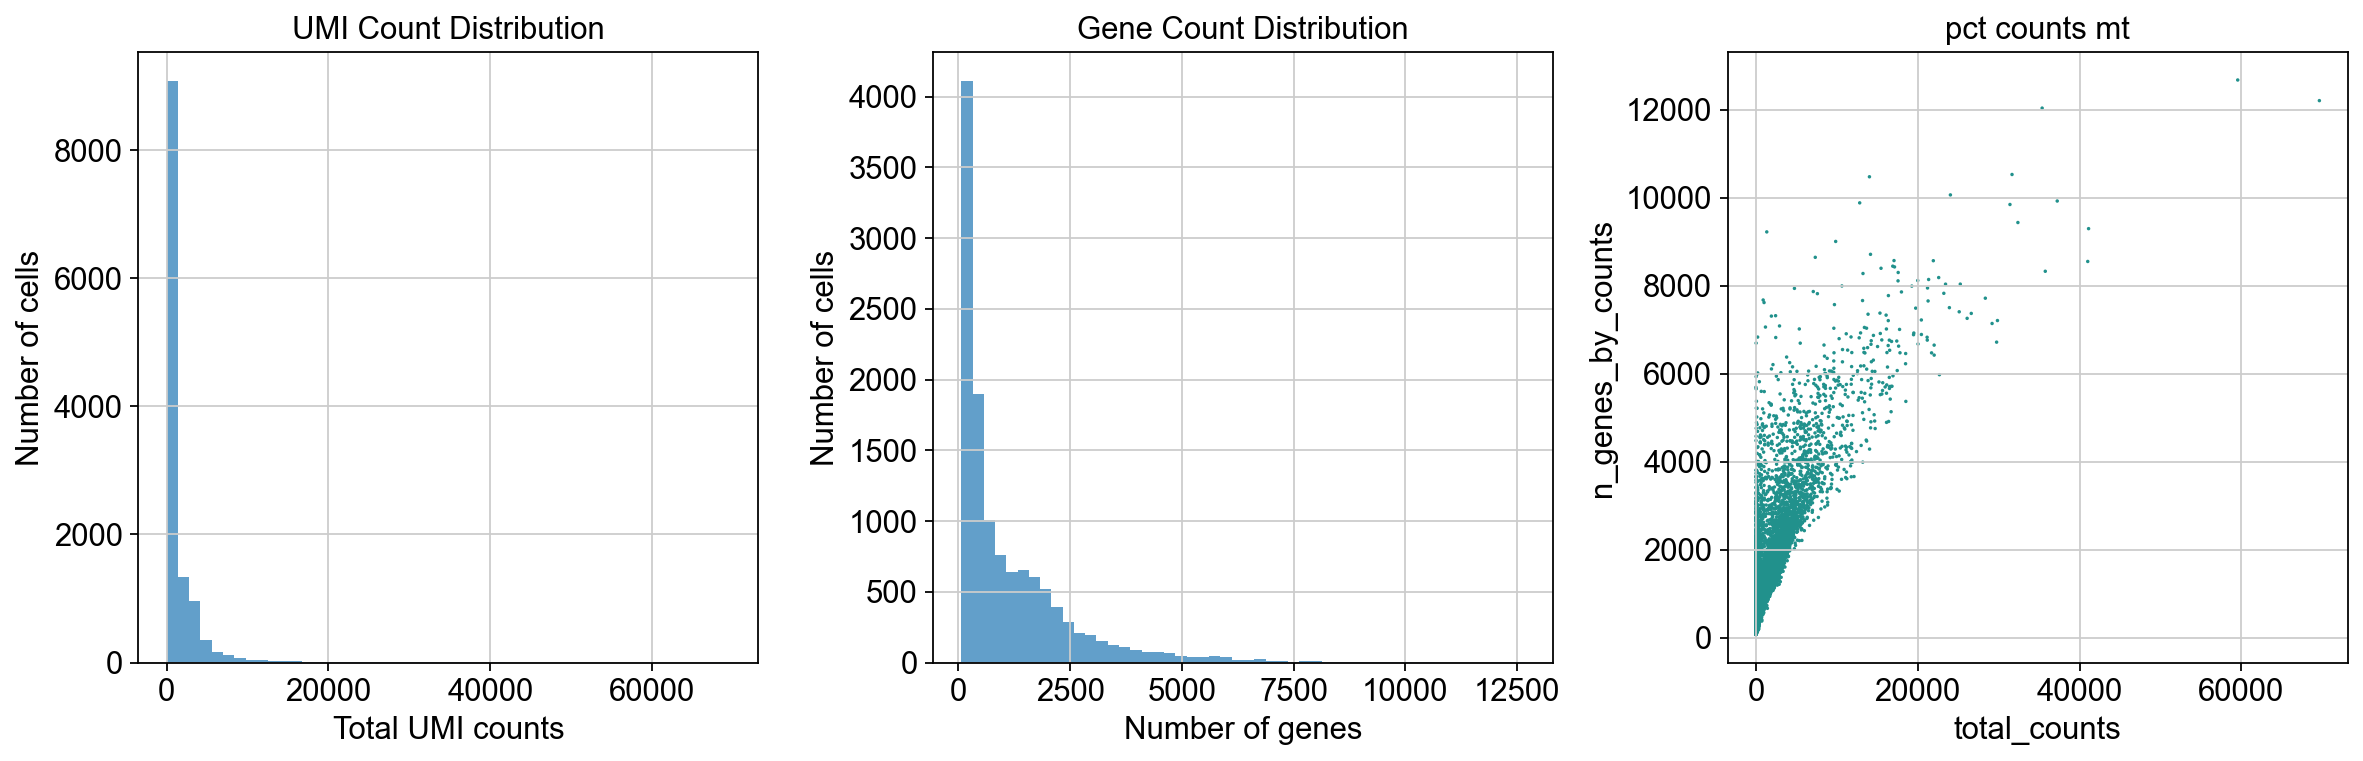


NORMALIZATION & SCALING
Parameters saved to: GSEA_20251020_231531/parameters.txt
NO custom hvg filter but just for your information:
There would be 4102 highly variable genes available

ADVANCED DIMENSIONALITY REDUCTION


Compute diffusion-based UMAP: 100%|██████████| 4/4 [00:44<00:00, 11.16s/step]



SPERMATOGENESIS TRAJECTORY INFERENCE
Root cluster set: 16

GSEA PATHWAY ANALYSIS
Progression groups: progression_group
EARLY    6163
LATE     6152
Name: count, dtype: int64
(1/1) Running GSEA with GO_Biological_Process_2023...
   -> 2440 pathways found

TOP PATHWAYS (first database):
                                                Term        ES       NES  \
0  Cellular Response To Organic Cyclic Compound (...  0.572271  2.594845   
1    Macromolecule Biosynthetic Process (GO:0009059)  0.637793  2.569535   
2               Protein Phosphorylation (GO:0006468)  0.527204   2.56155   
3  Negative Regulation Of Protein Metabolic Proce...  0.563924  2.558152   
4  Negative Regulation Of Nucleic Acid-Templated ...  0.519599  2.557502   
5  Regulation Of Macromolecule Metabolic Process ...  0.575625  2.551782   
6            Regulation Of Angiogenesis (GO:0045765)   0.56863  2.547214   
7                       Phosphorylation (GO:0016310)  0.524074  2.542046   
8                       Gene E

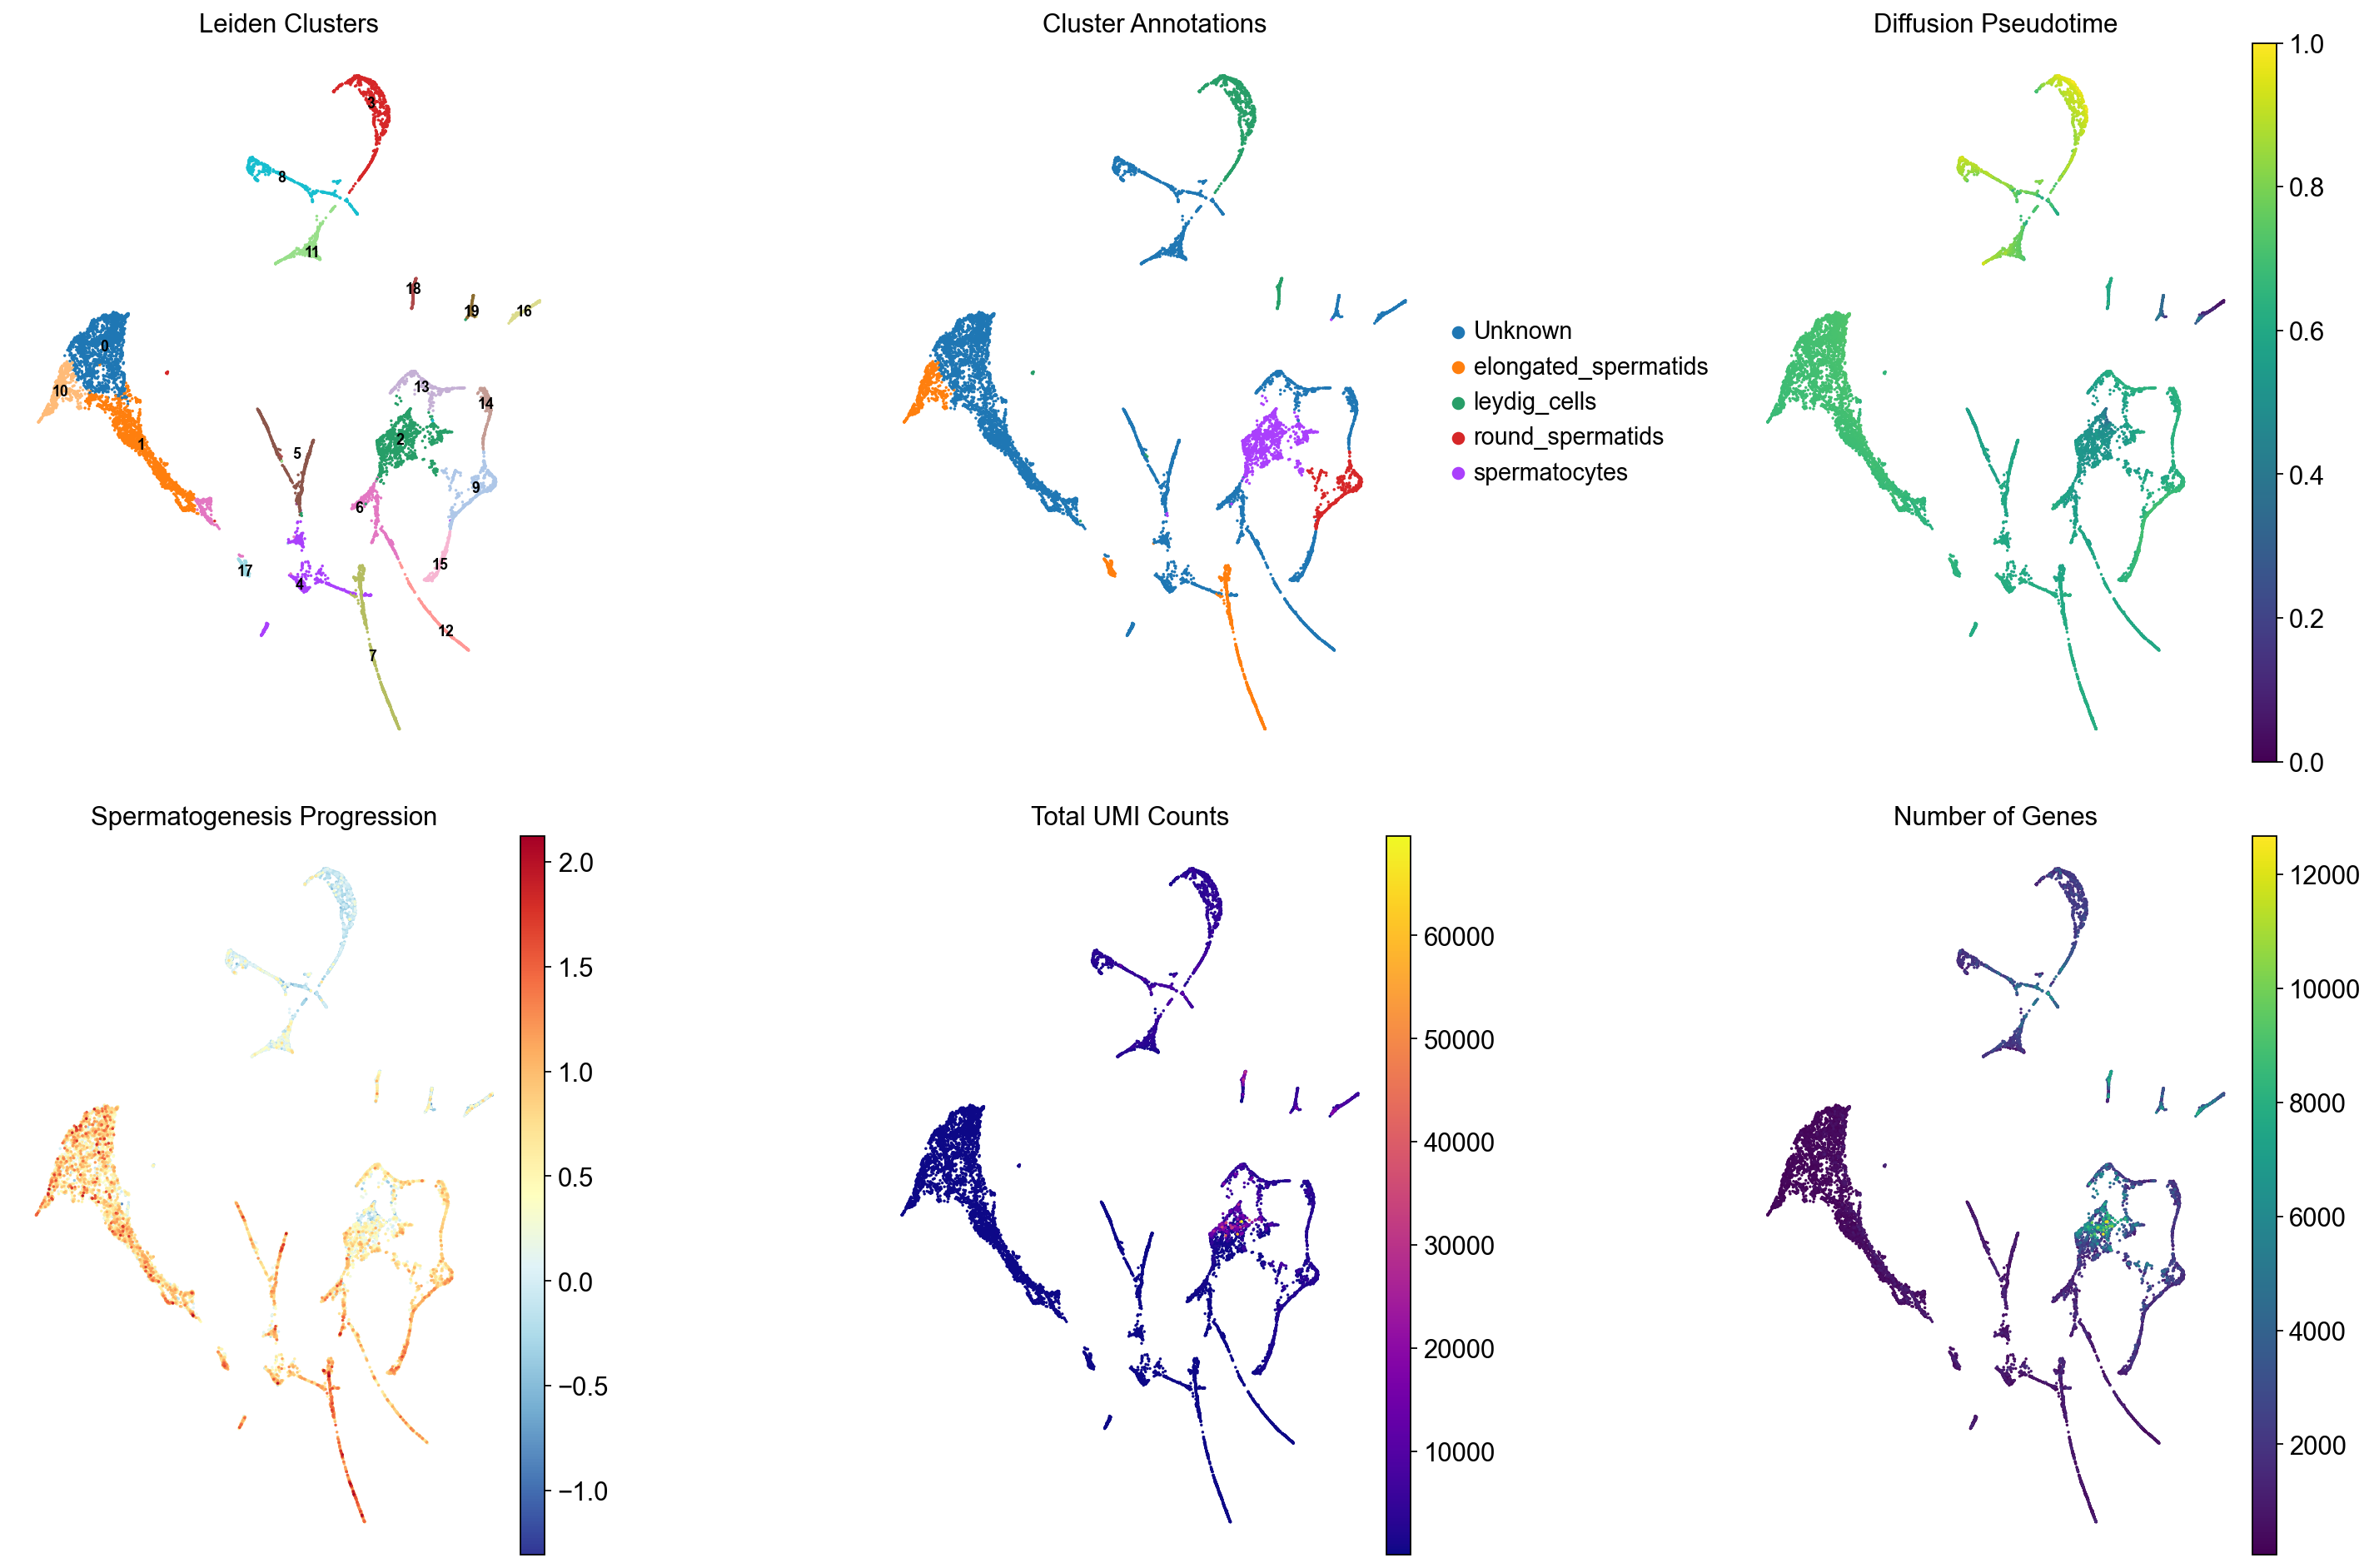


Creating cluster-specific marker plots...
!!!! No markers available for cluster 0
!!!! No markers available for cluster 1


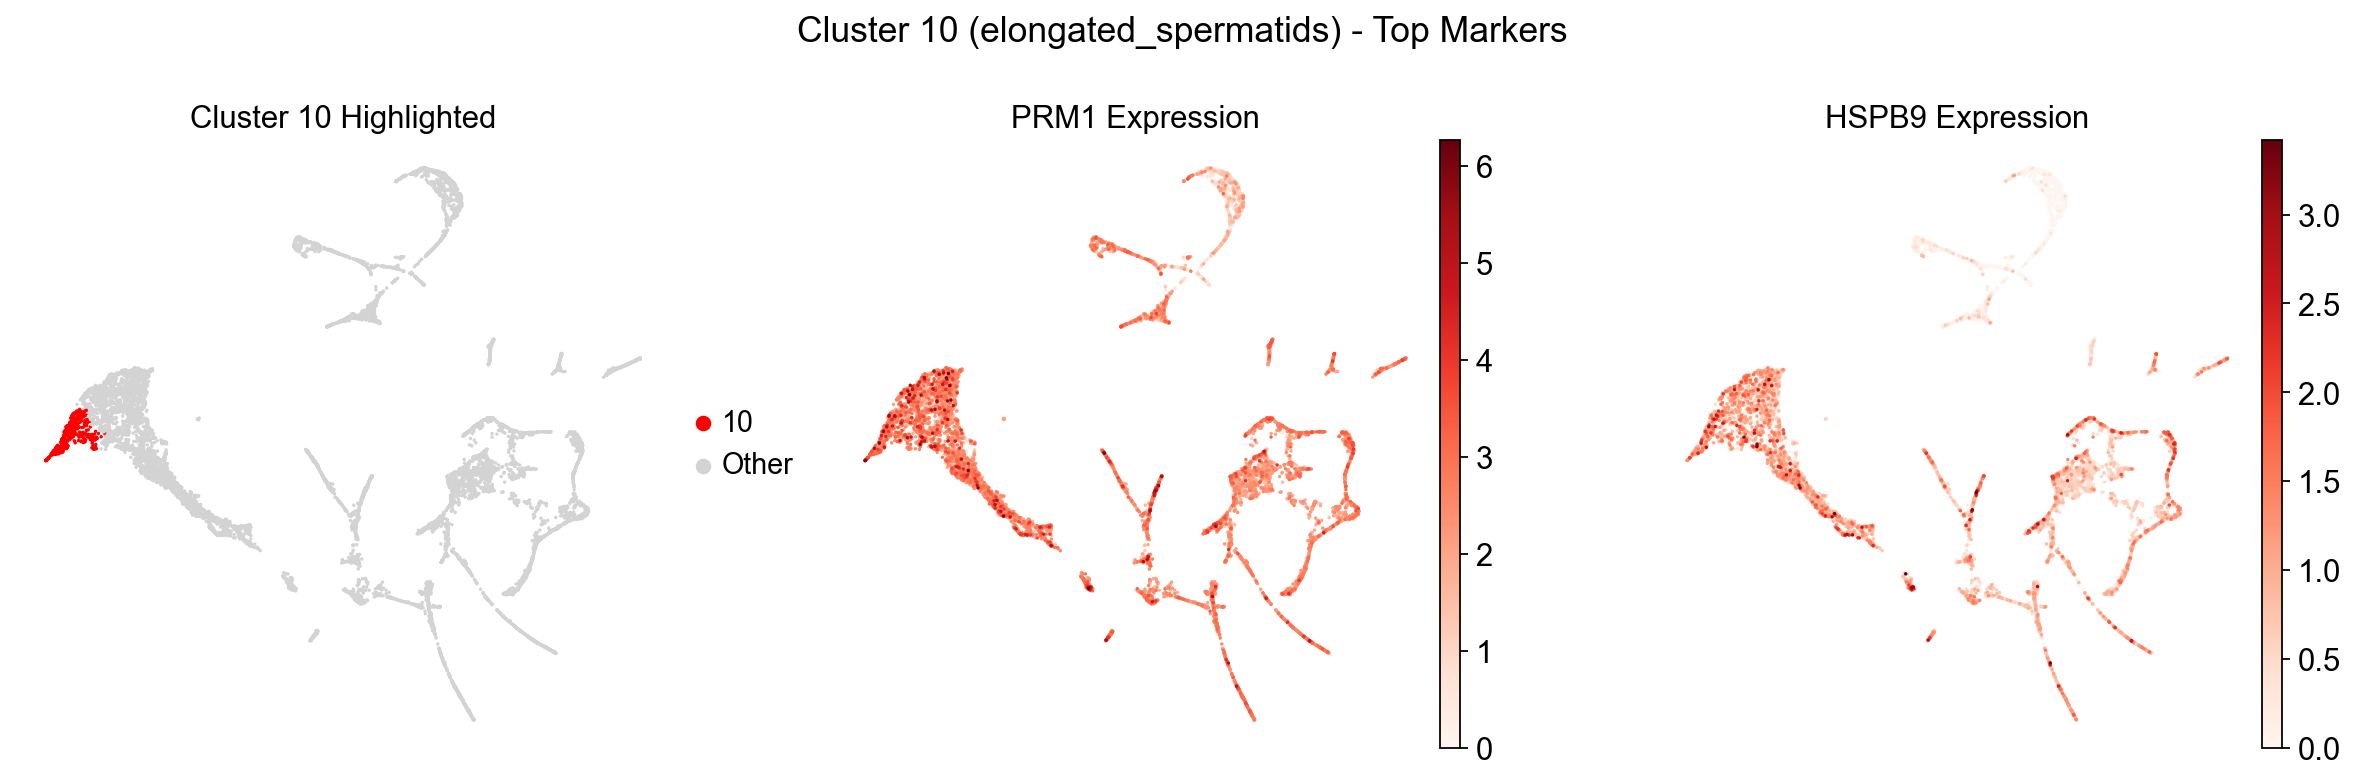

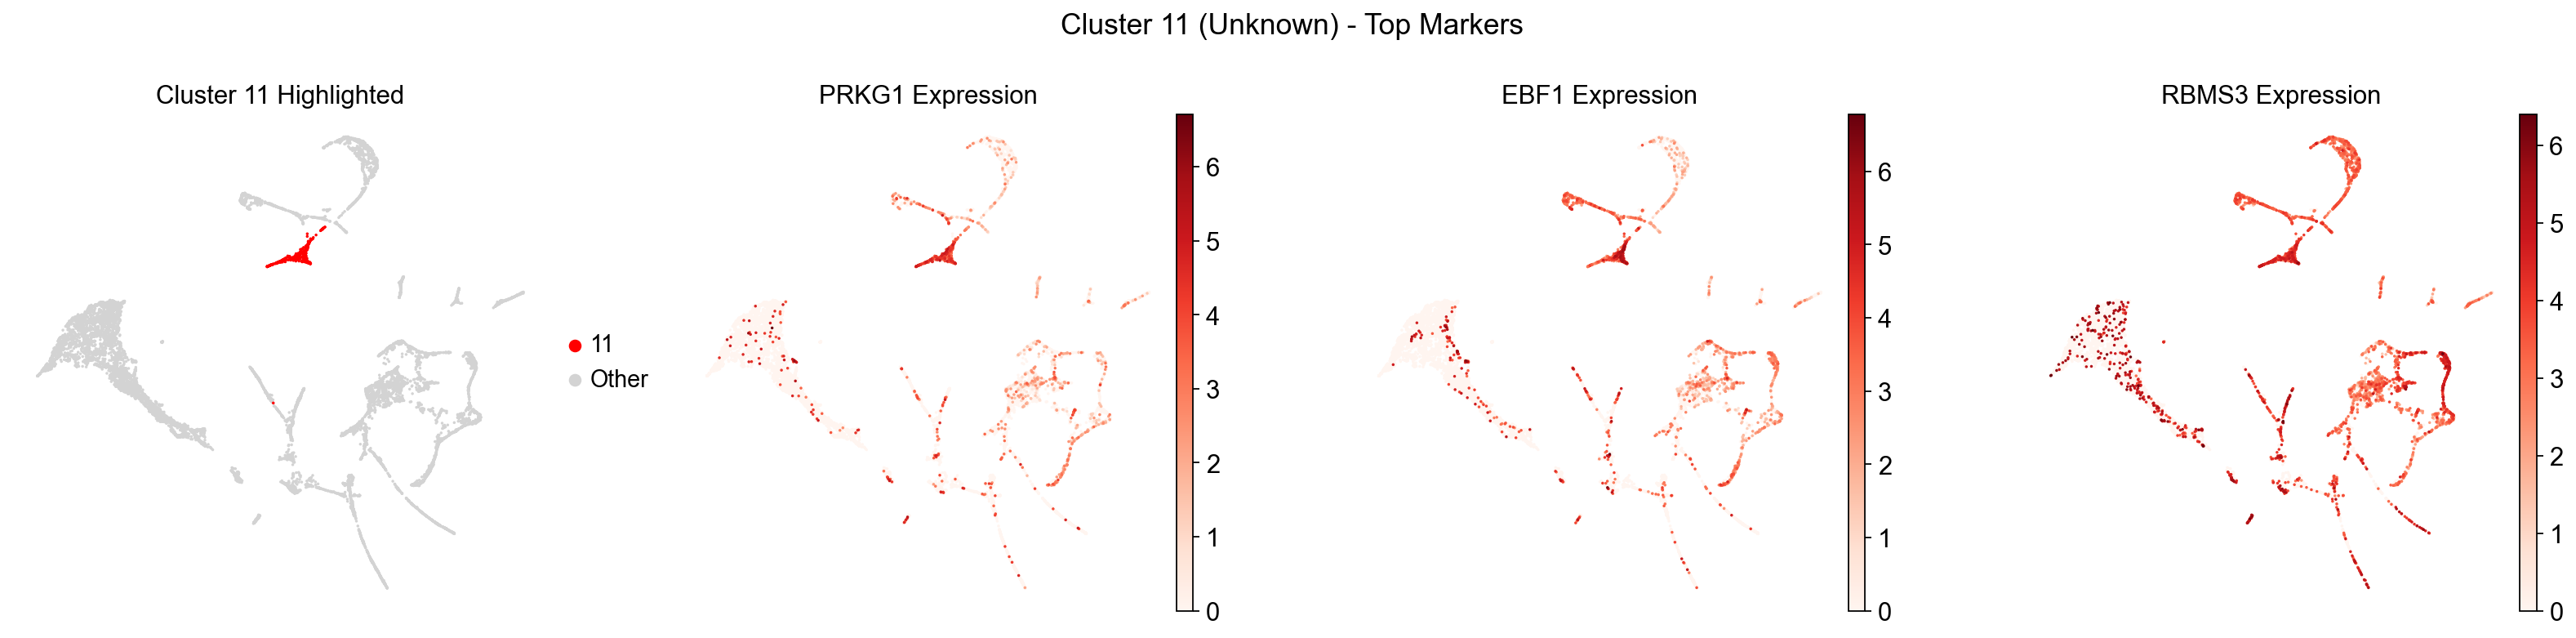

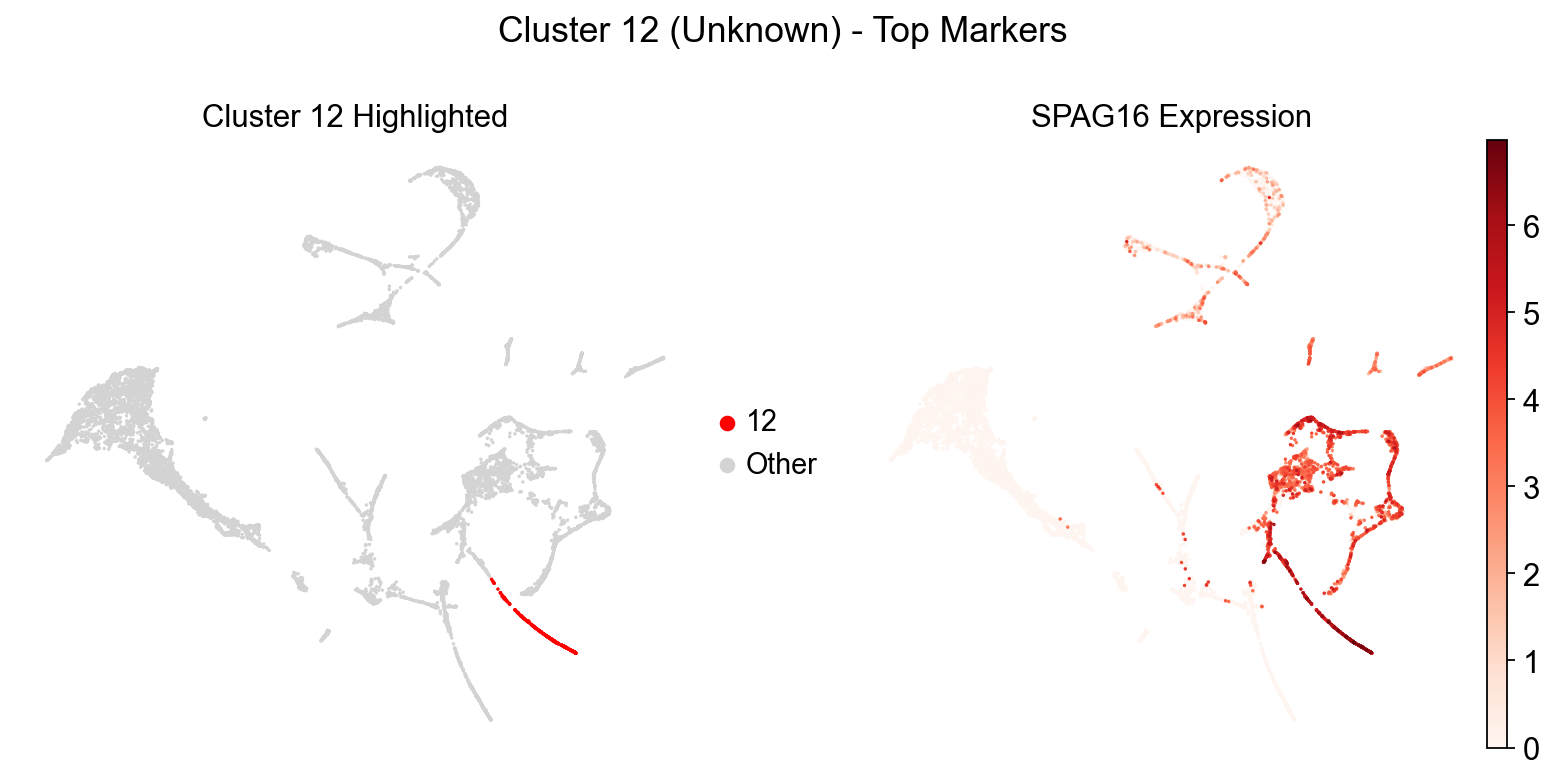

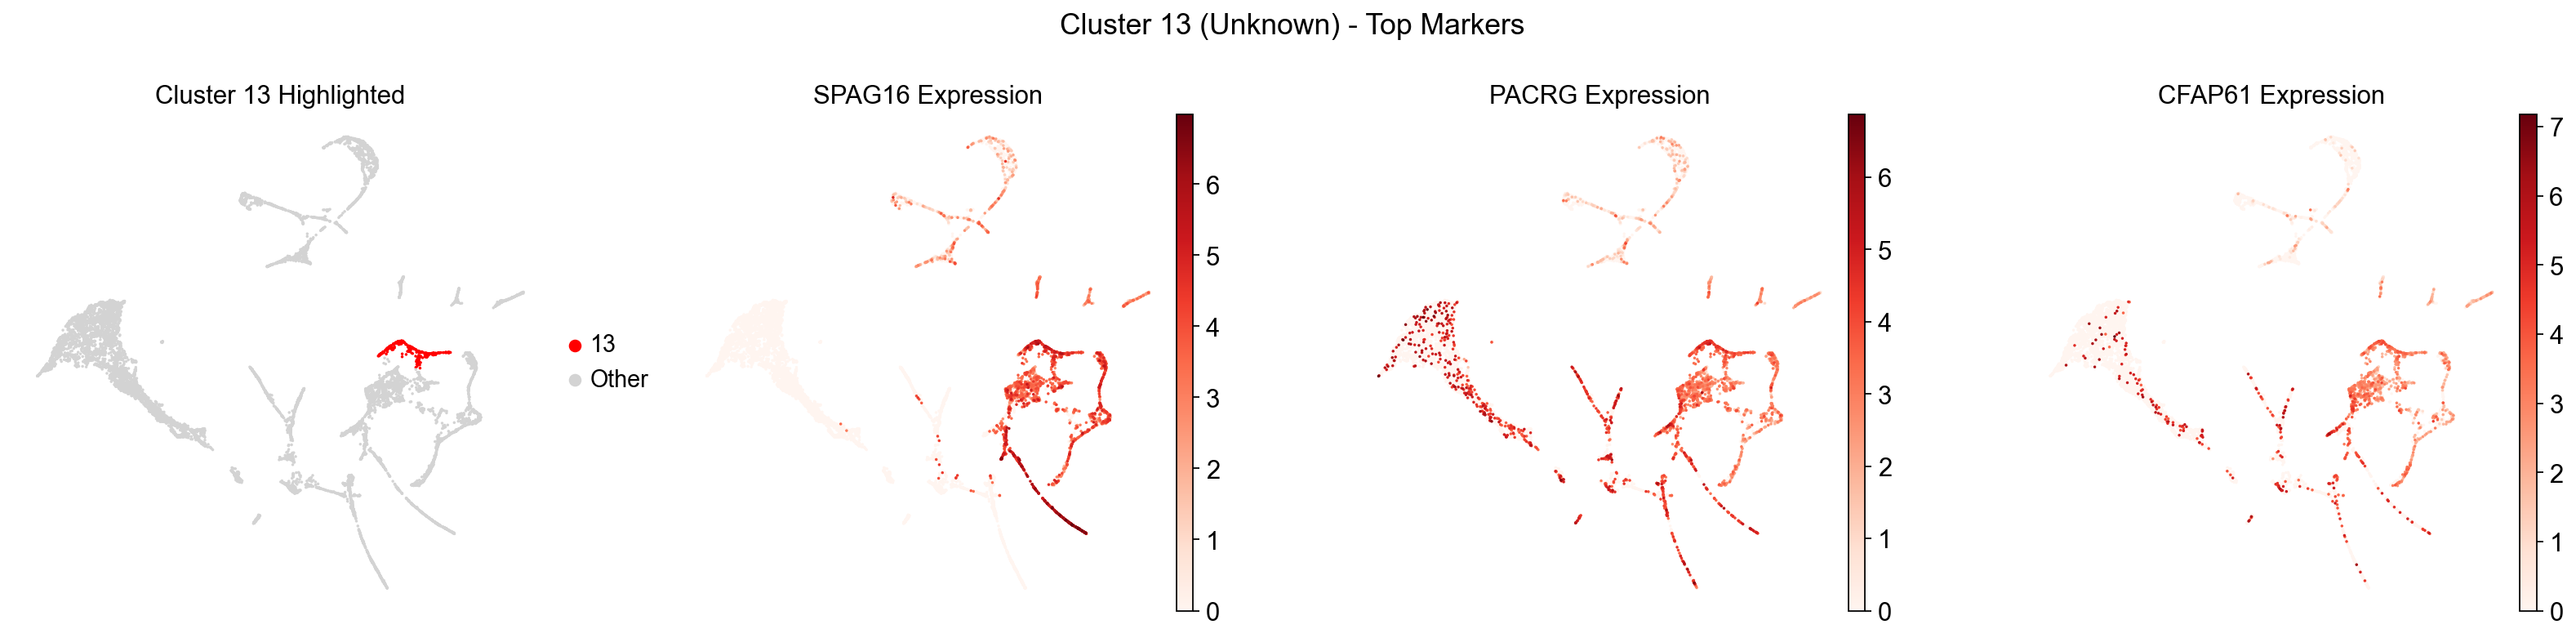

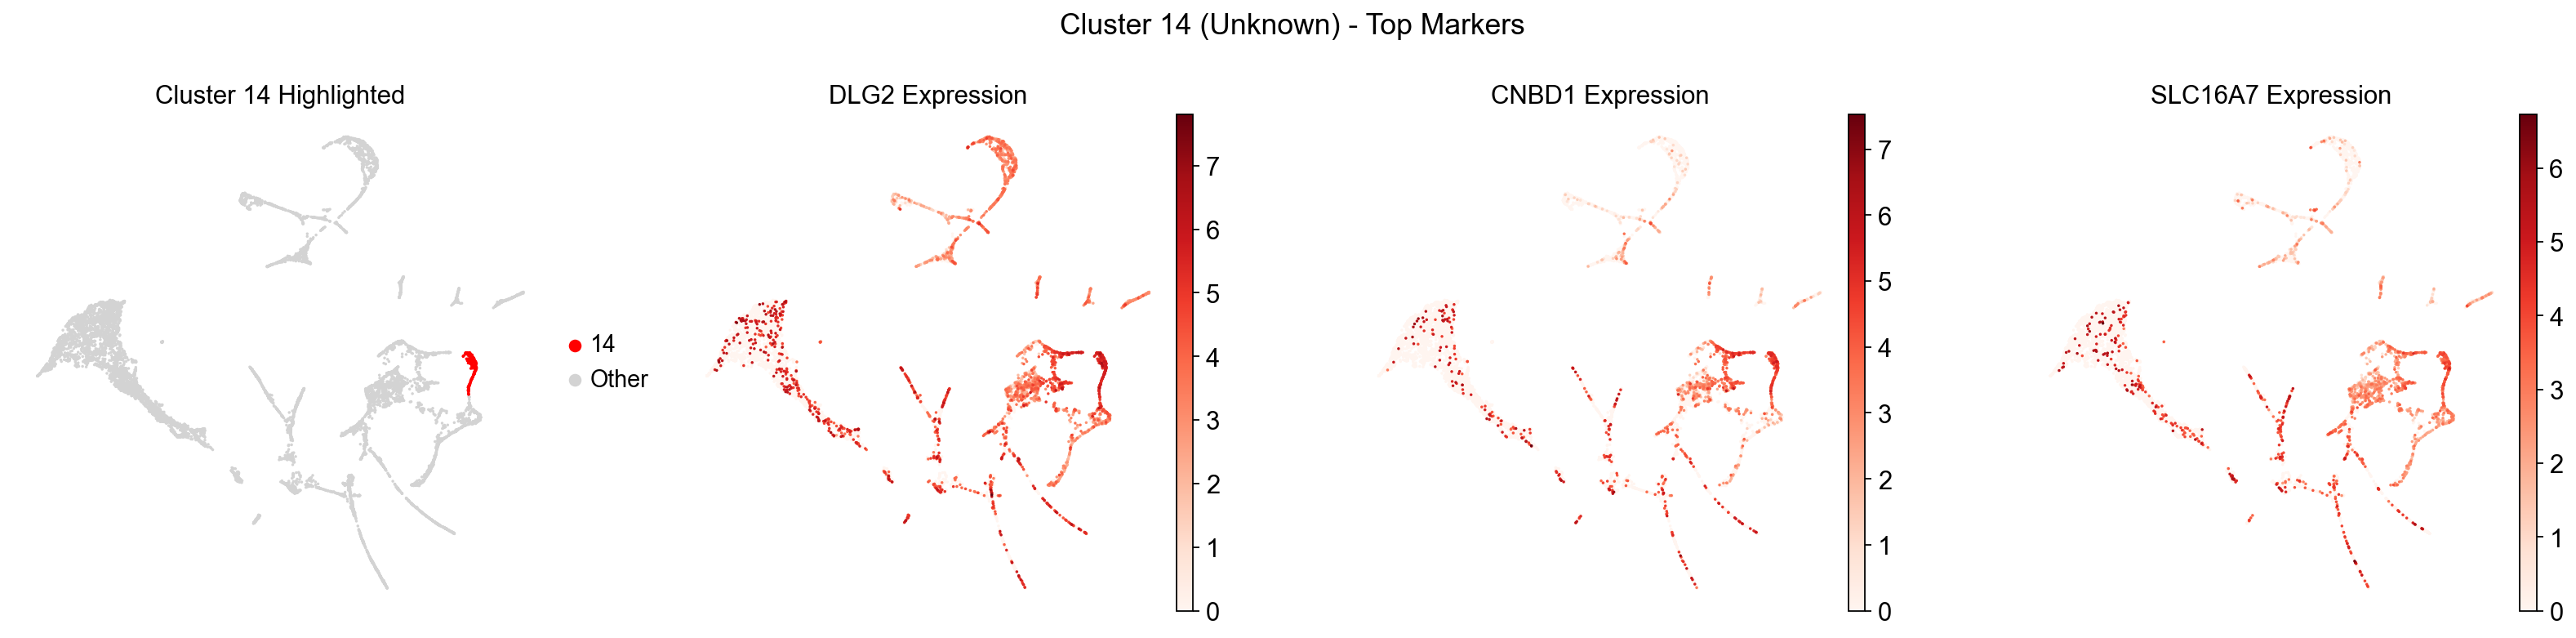

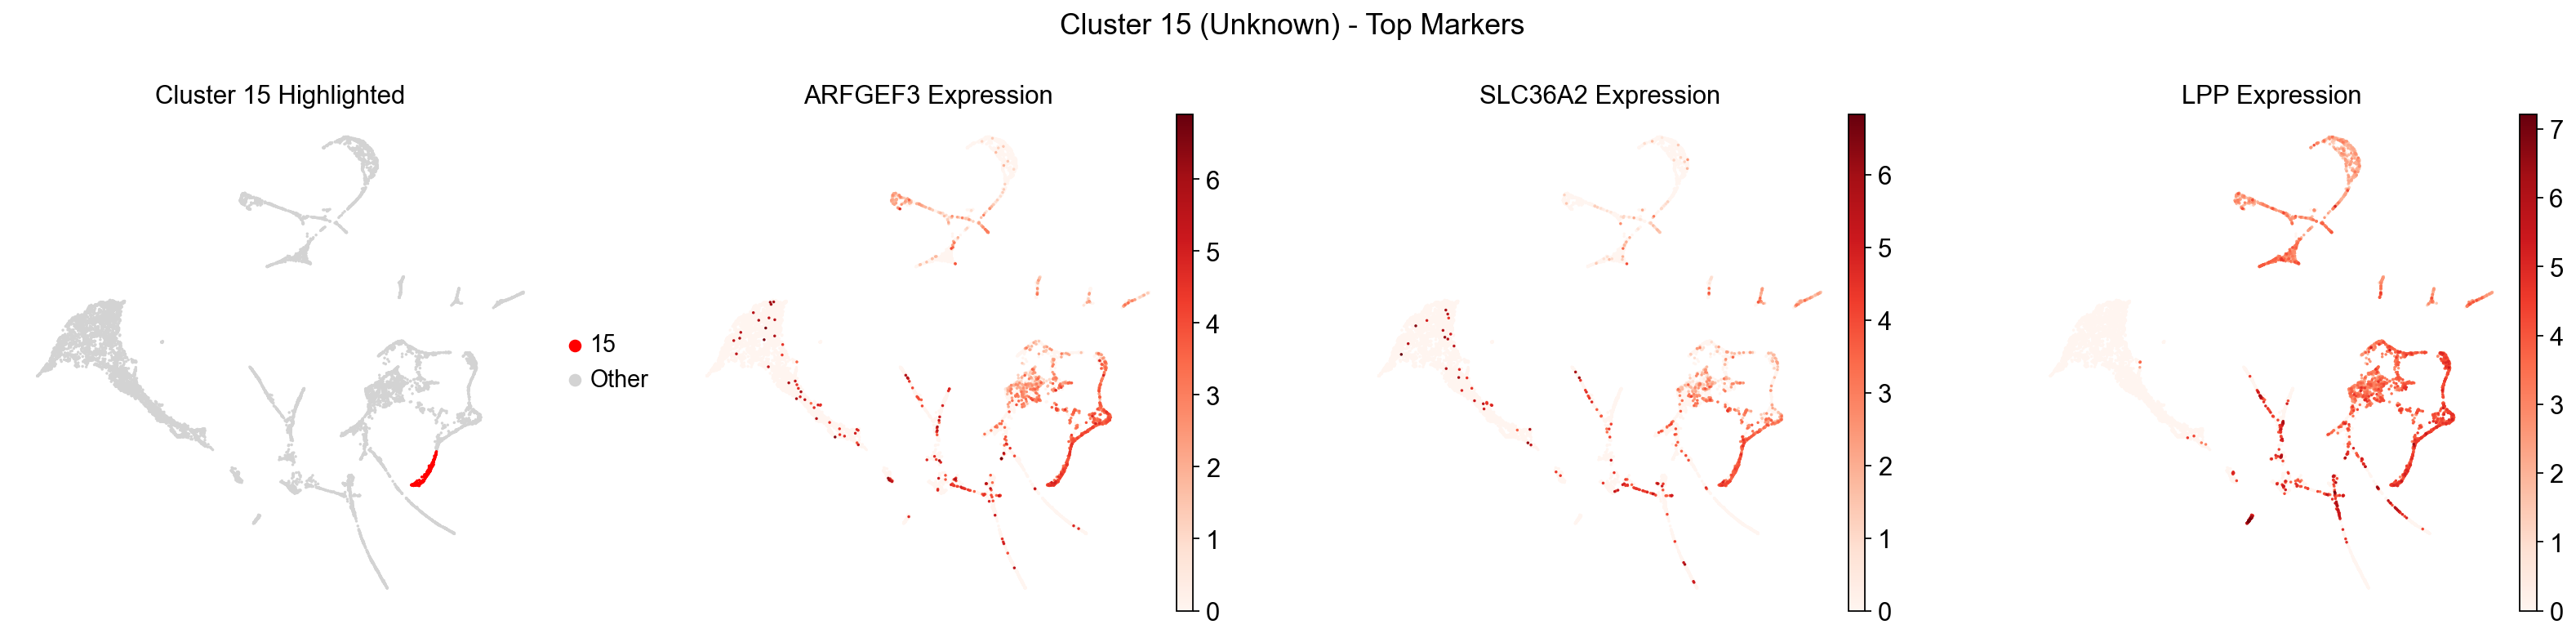

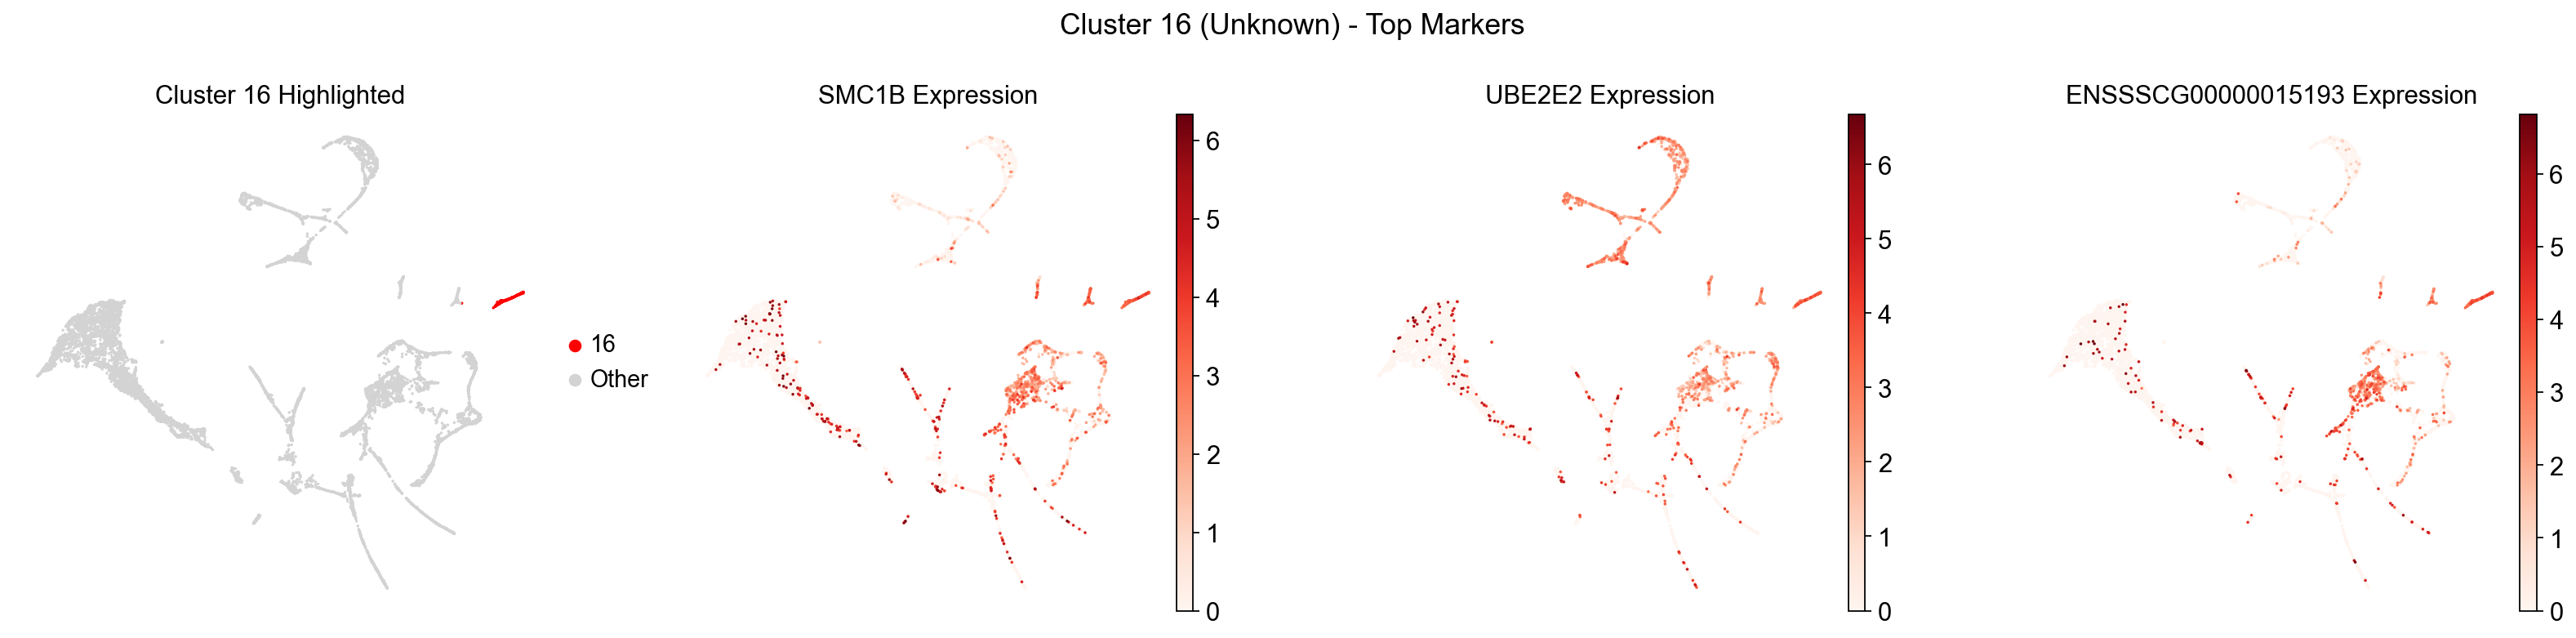

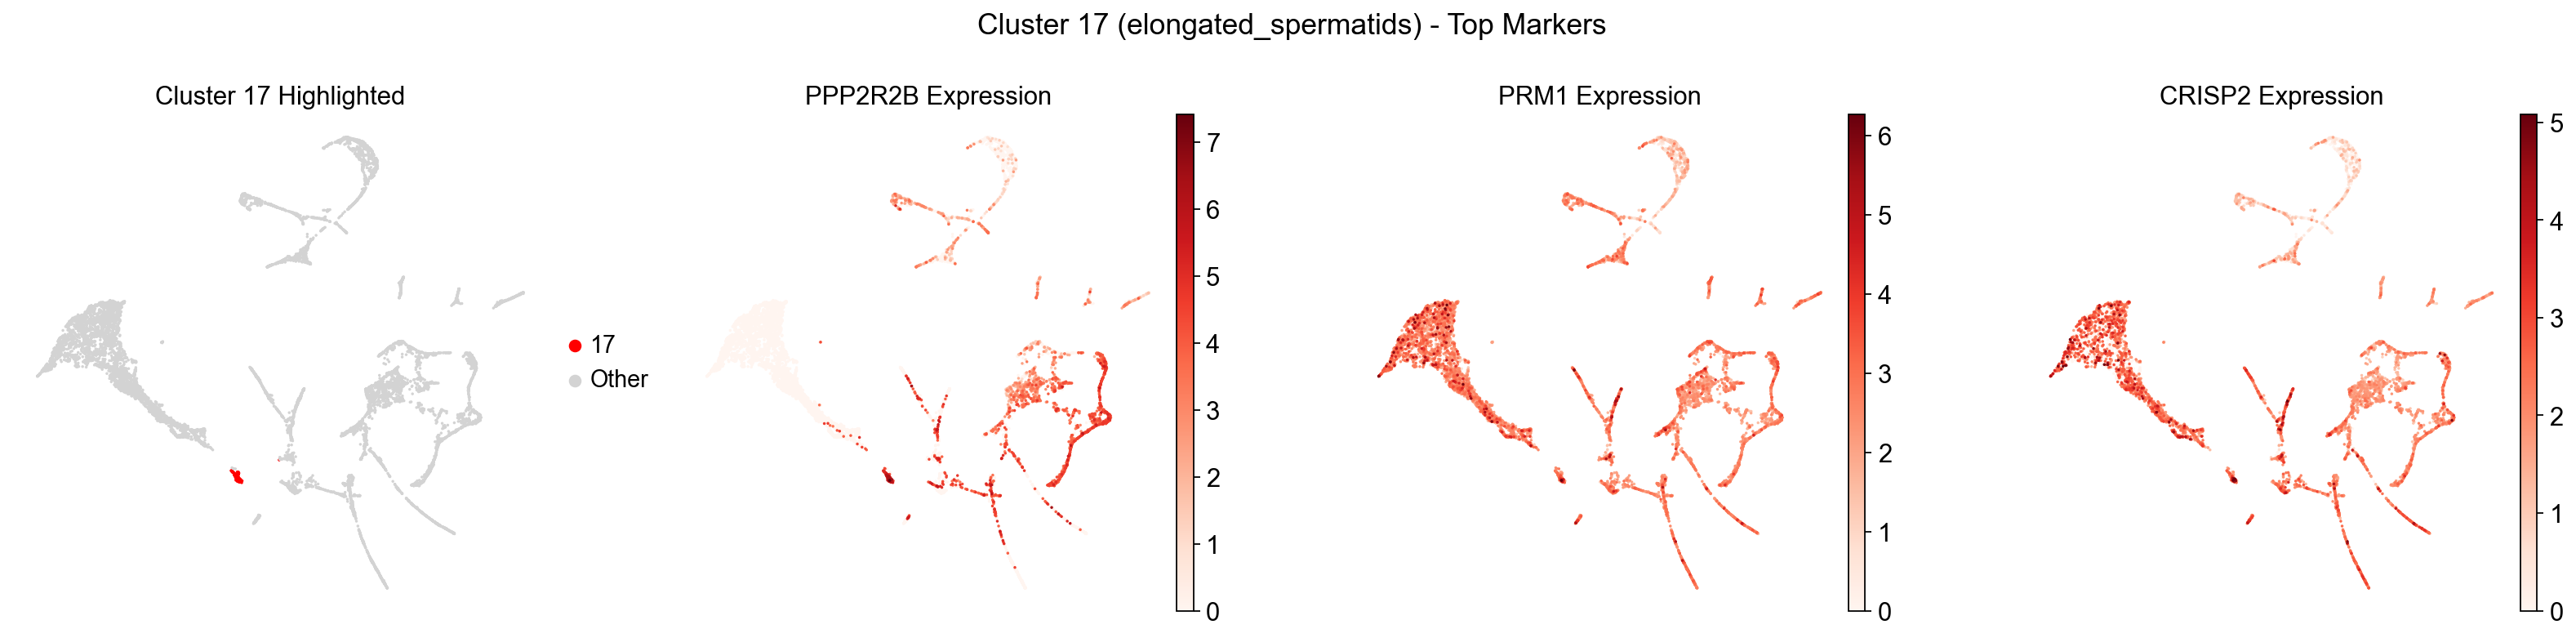

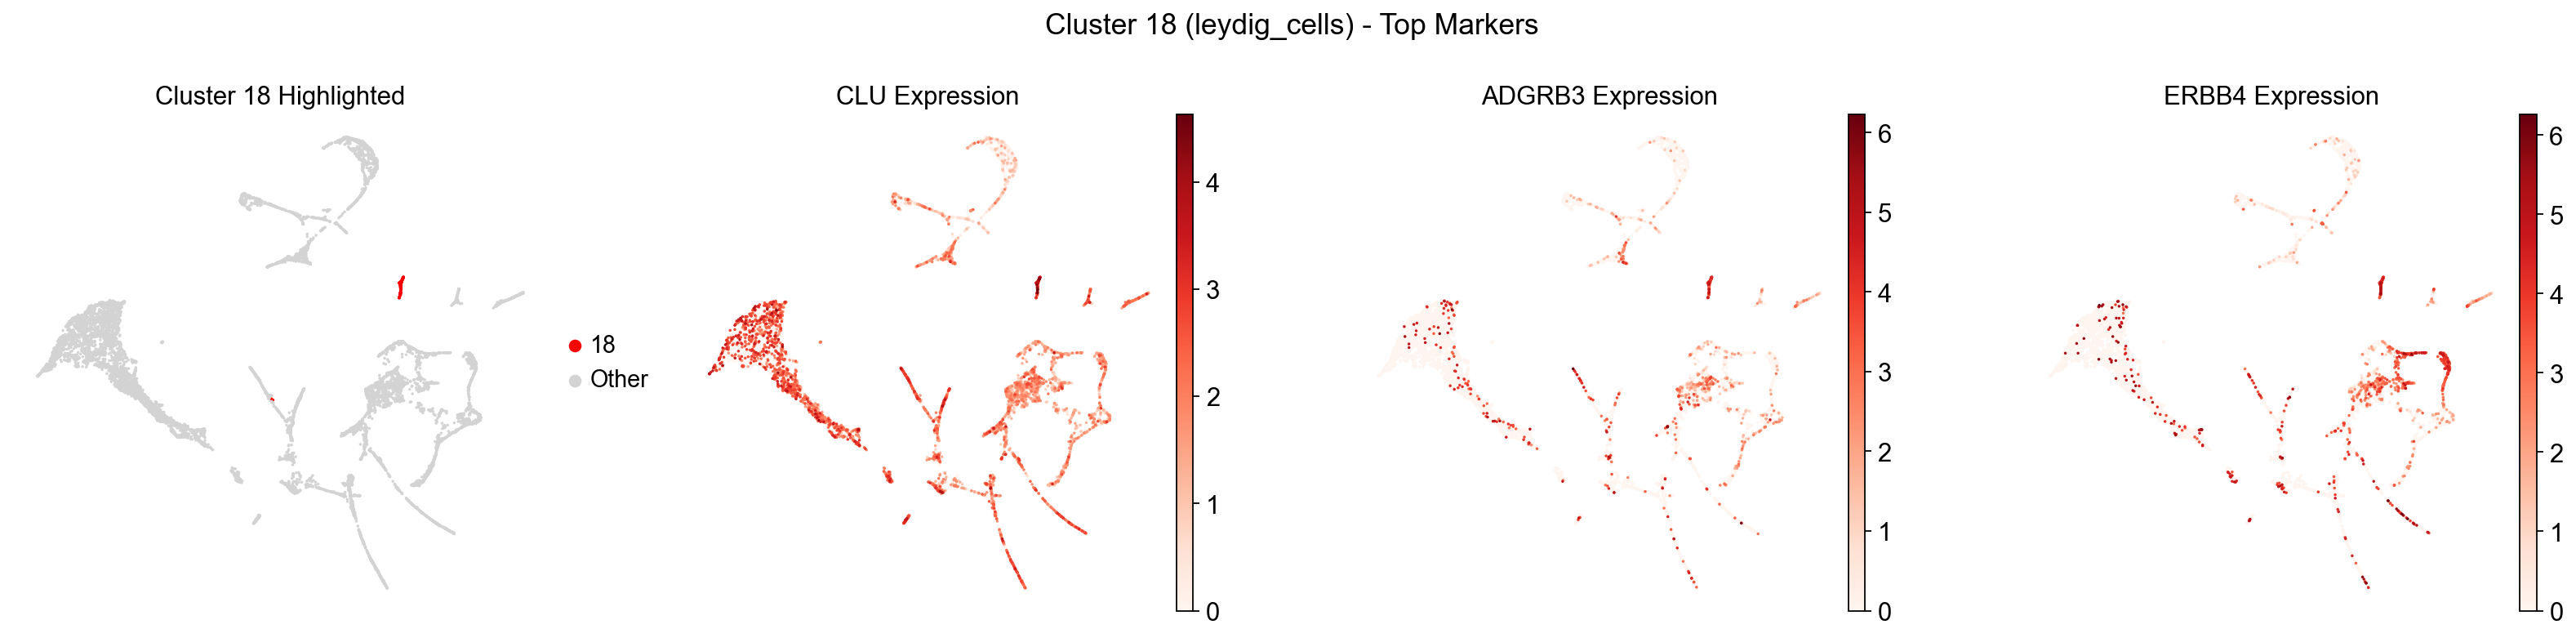

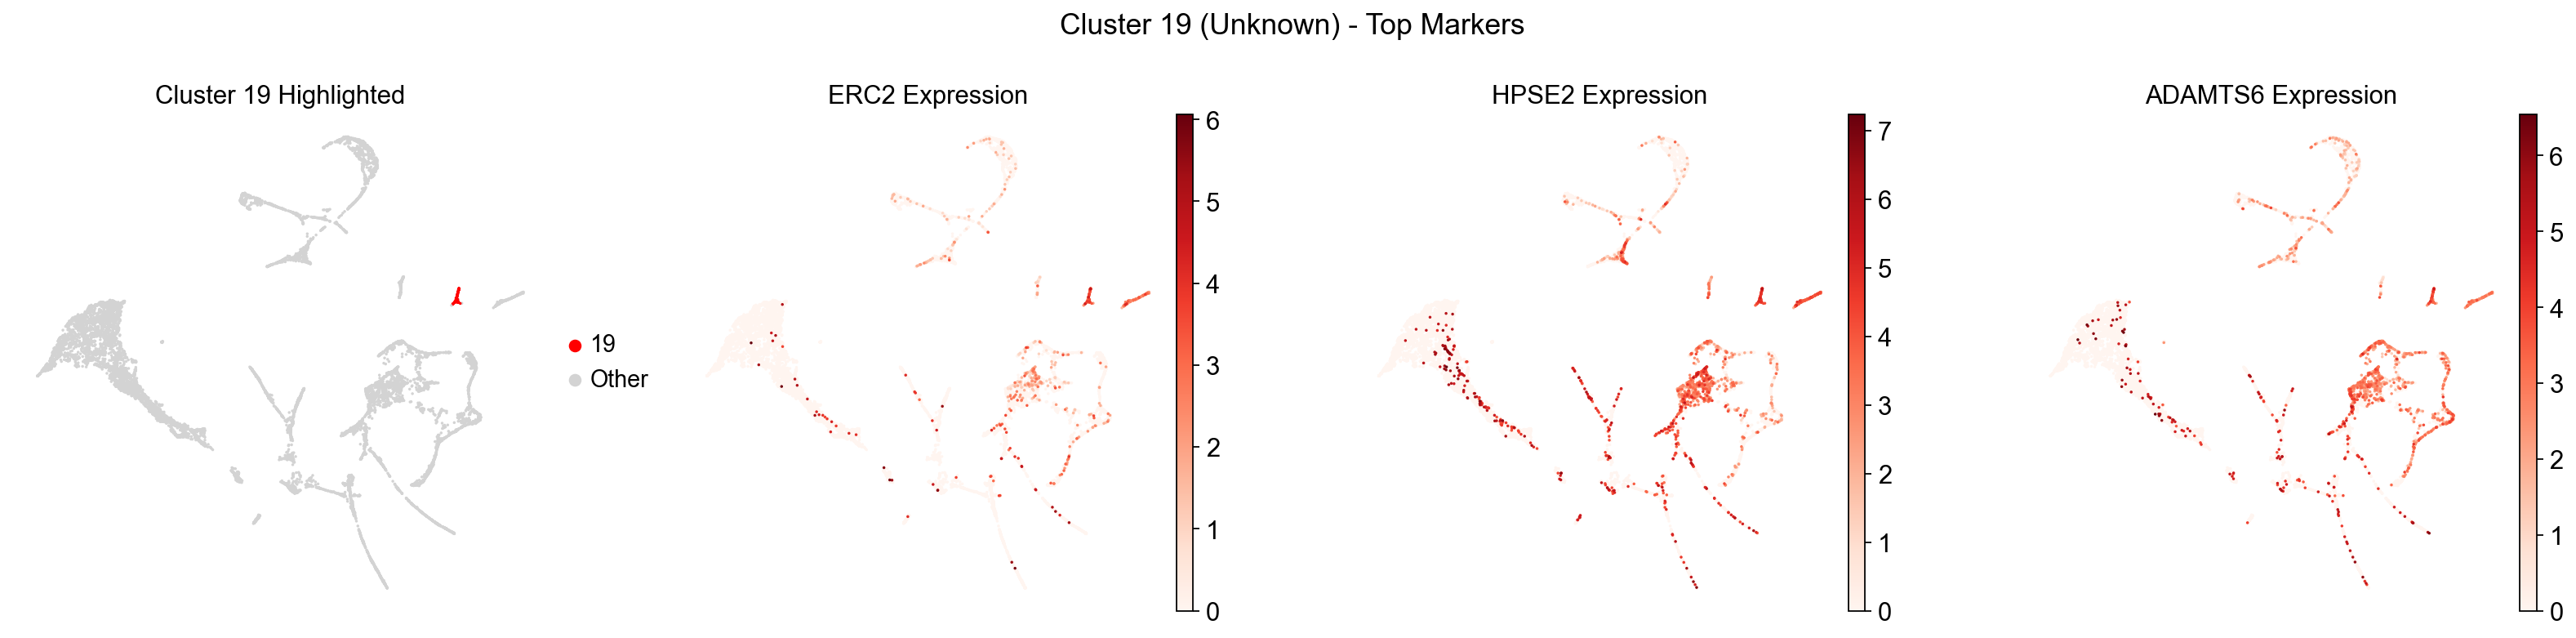

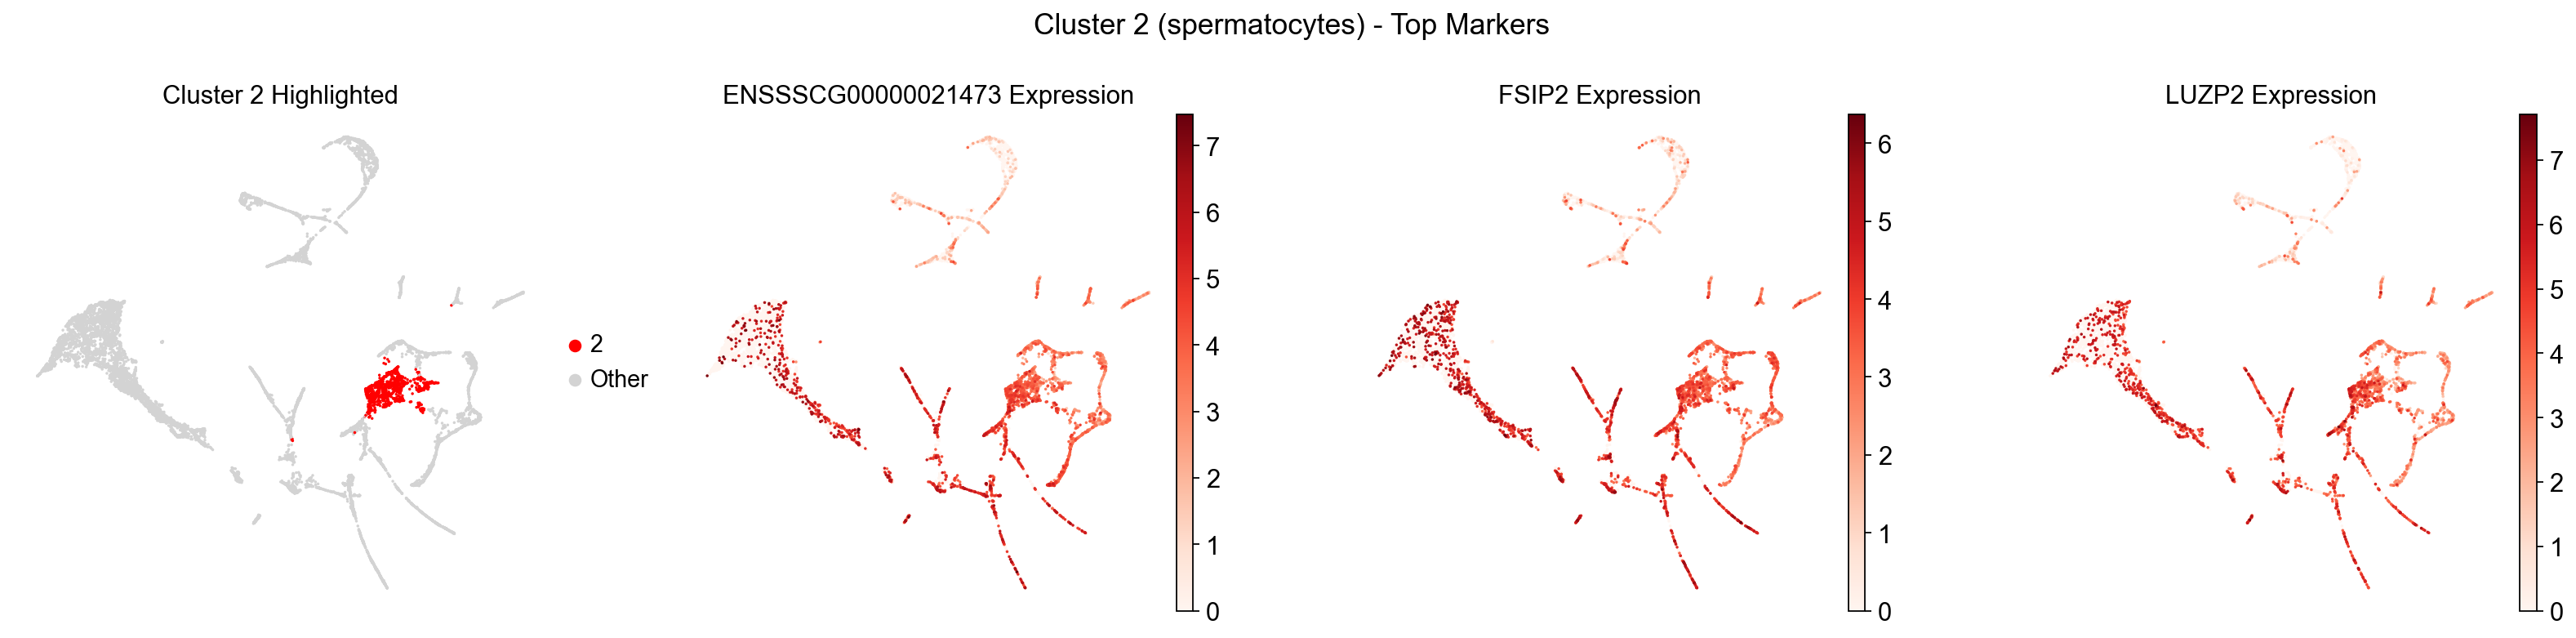

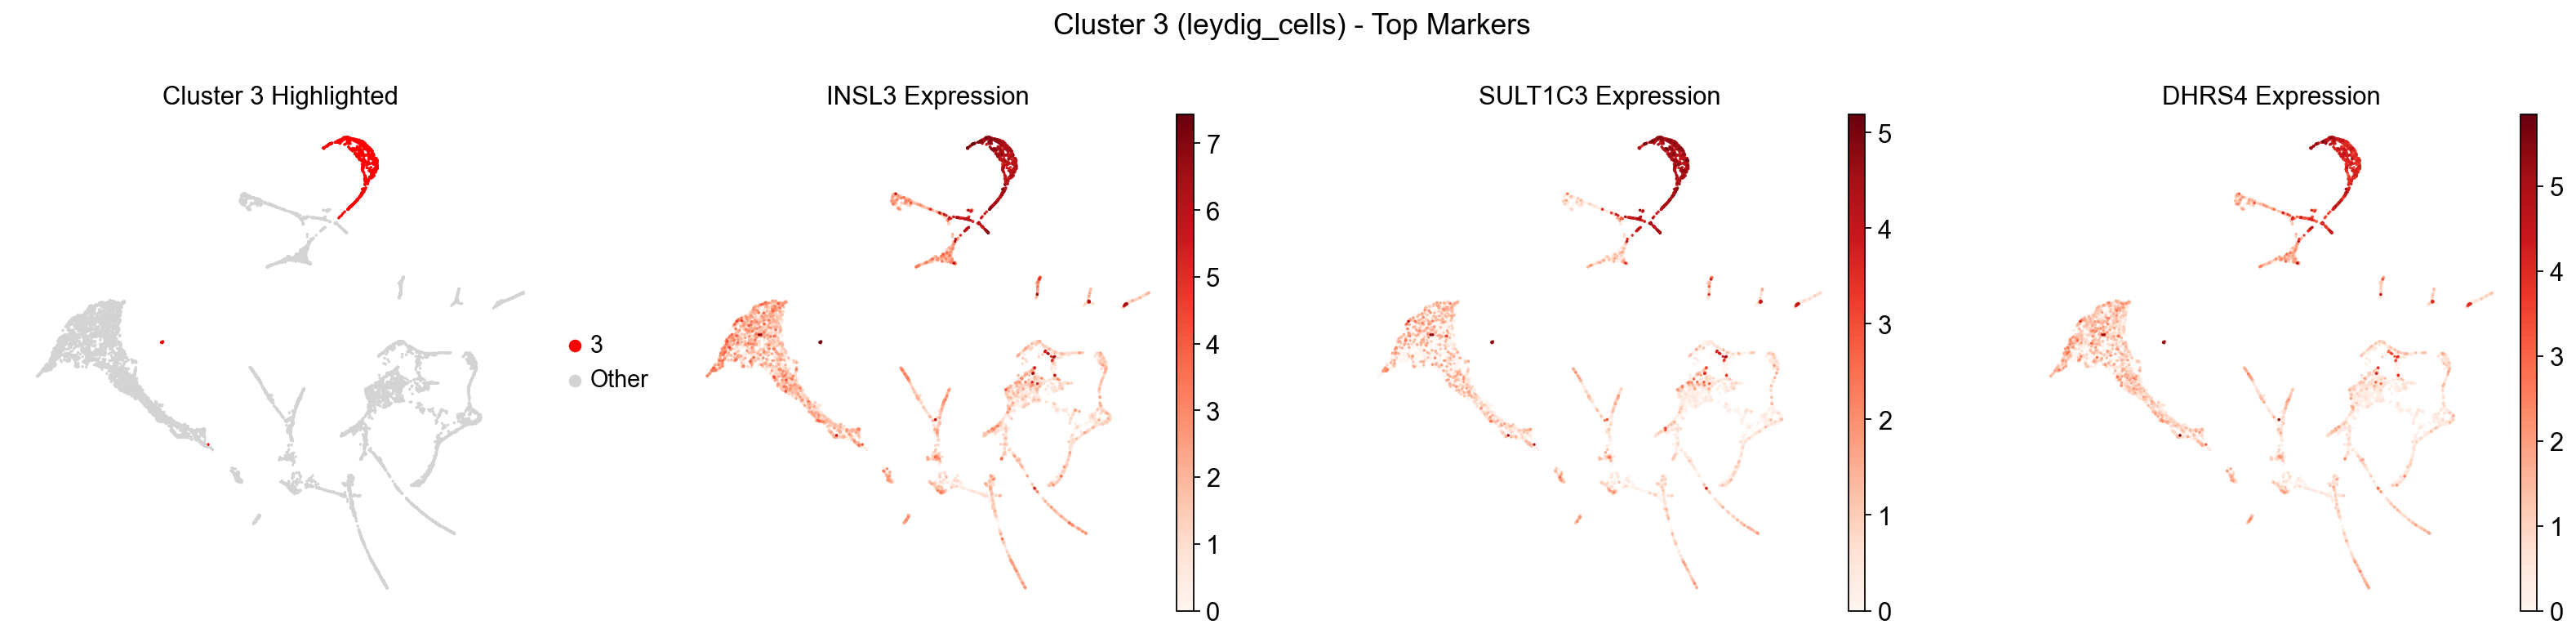

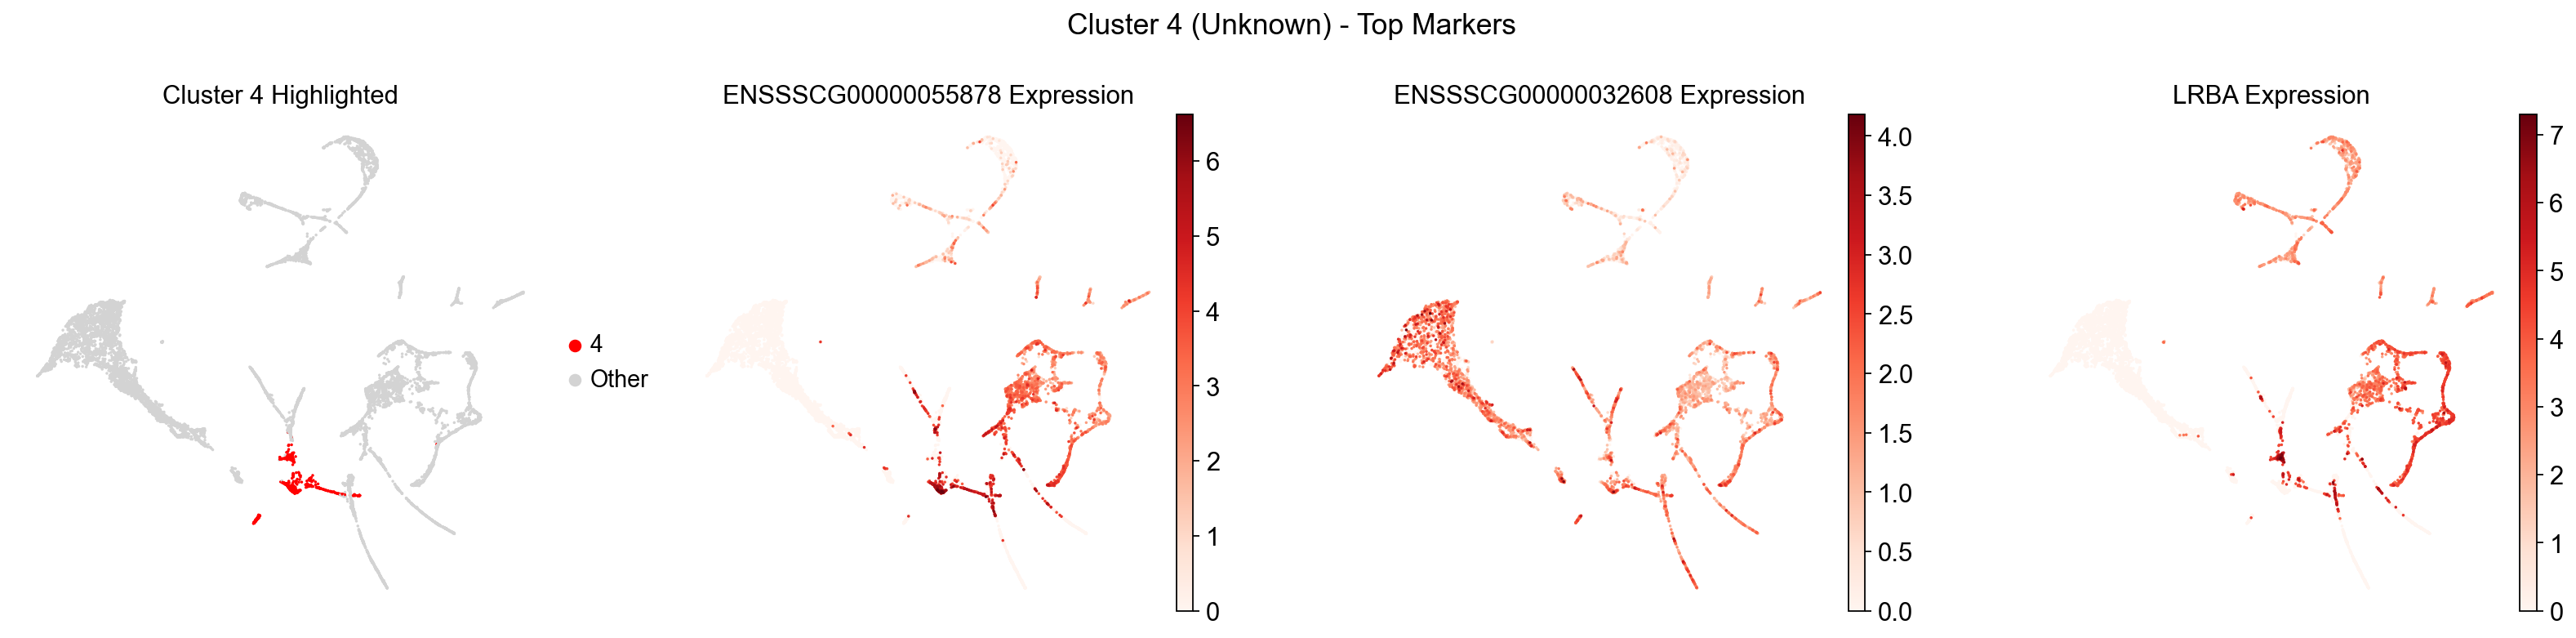

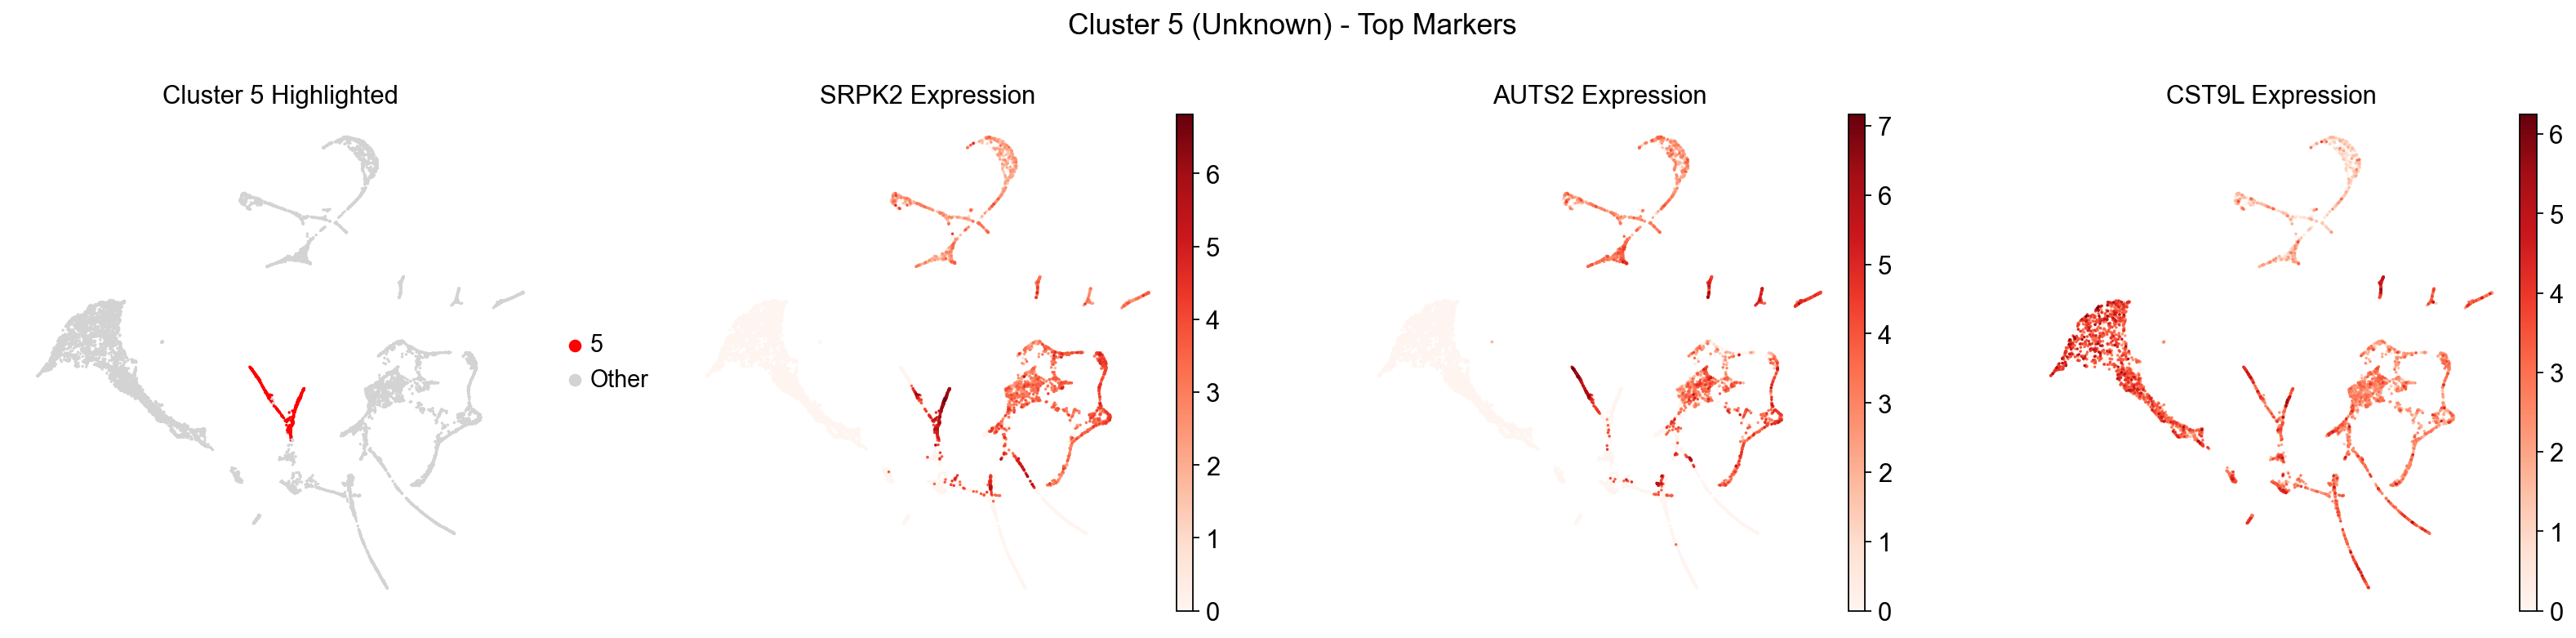

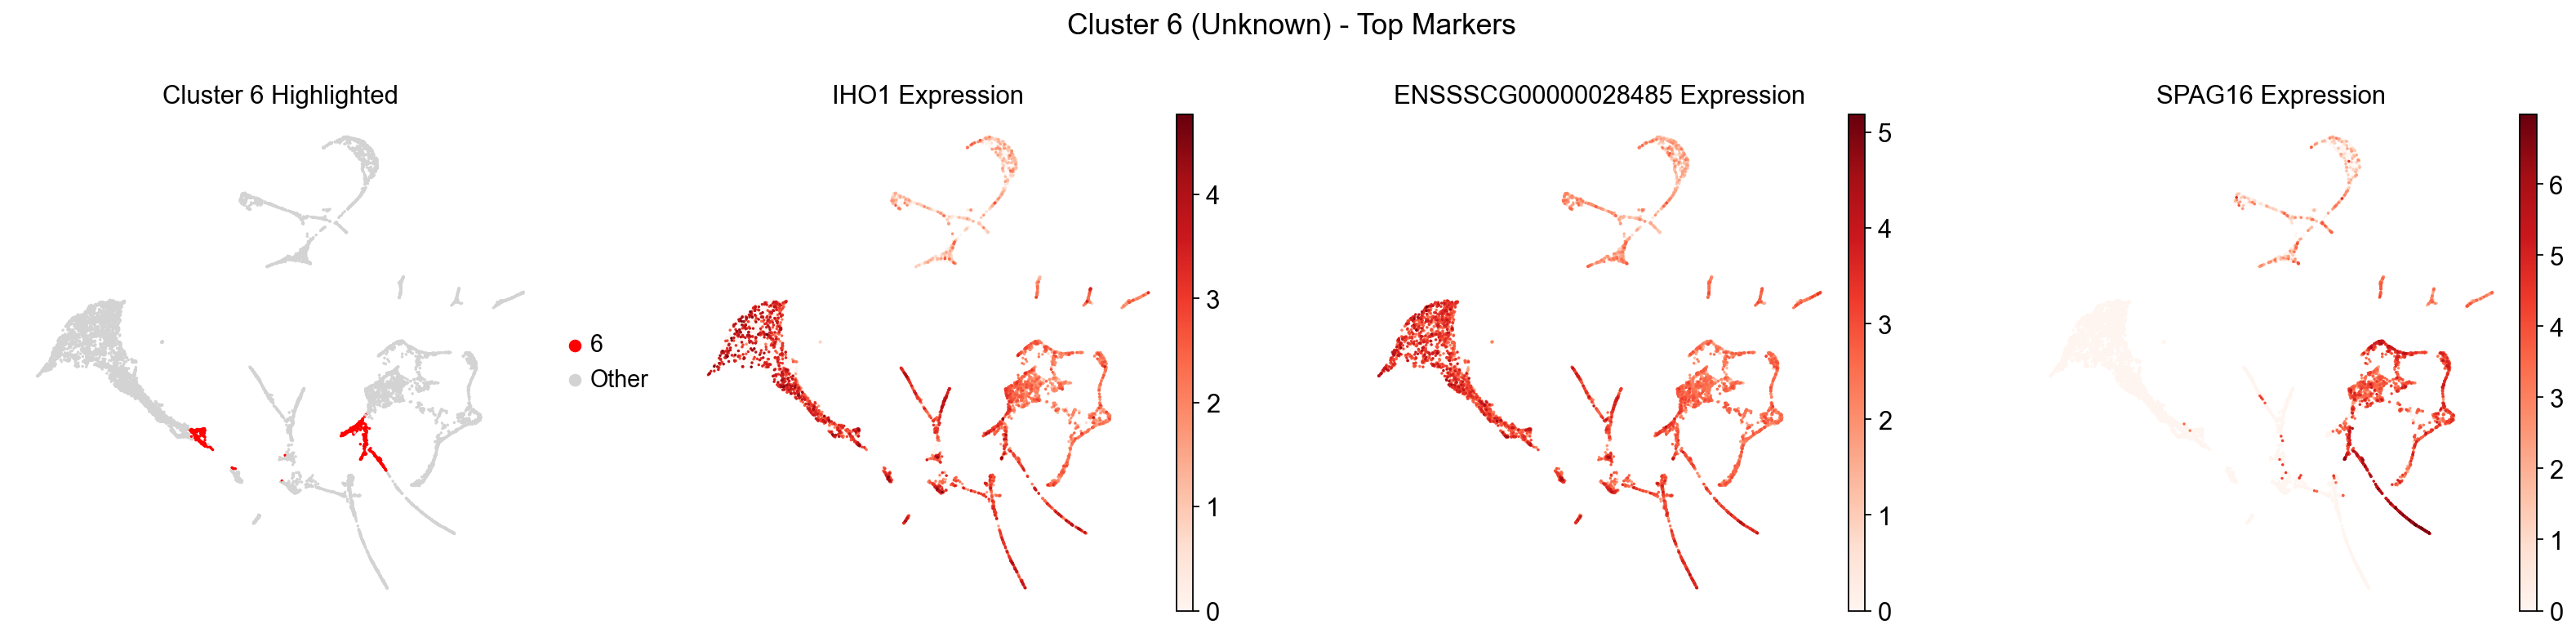

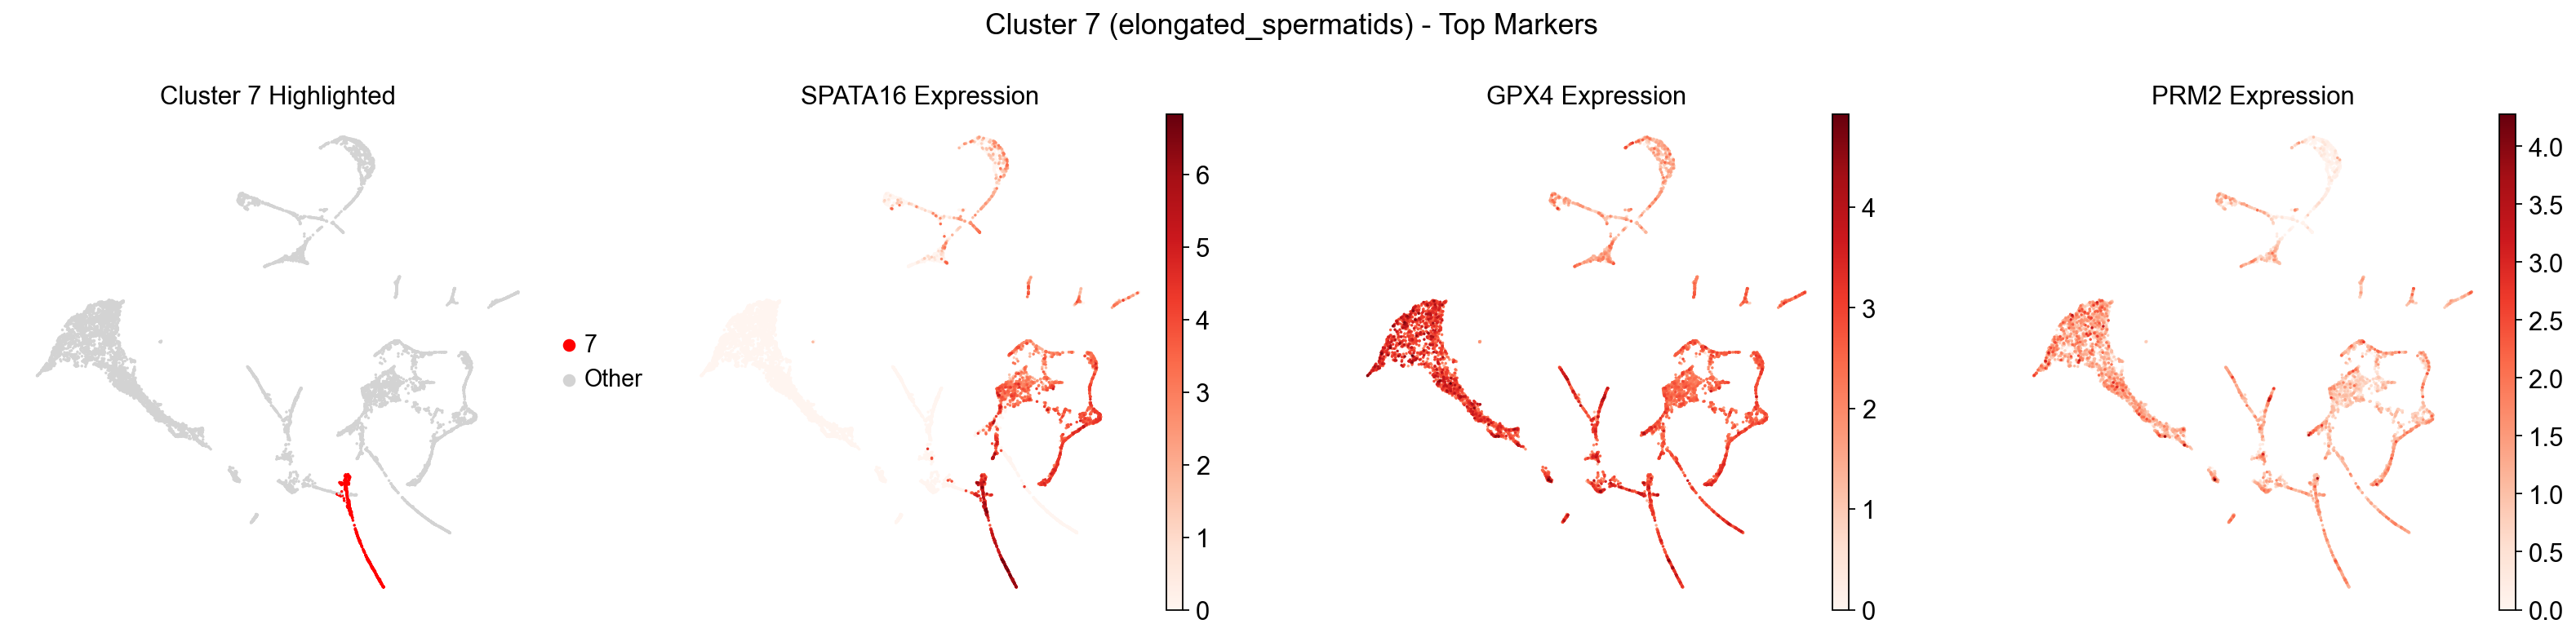

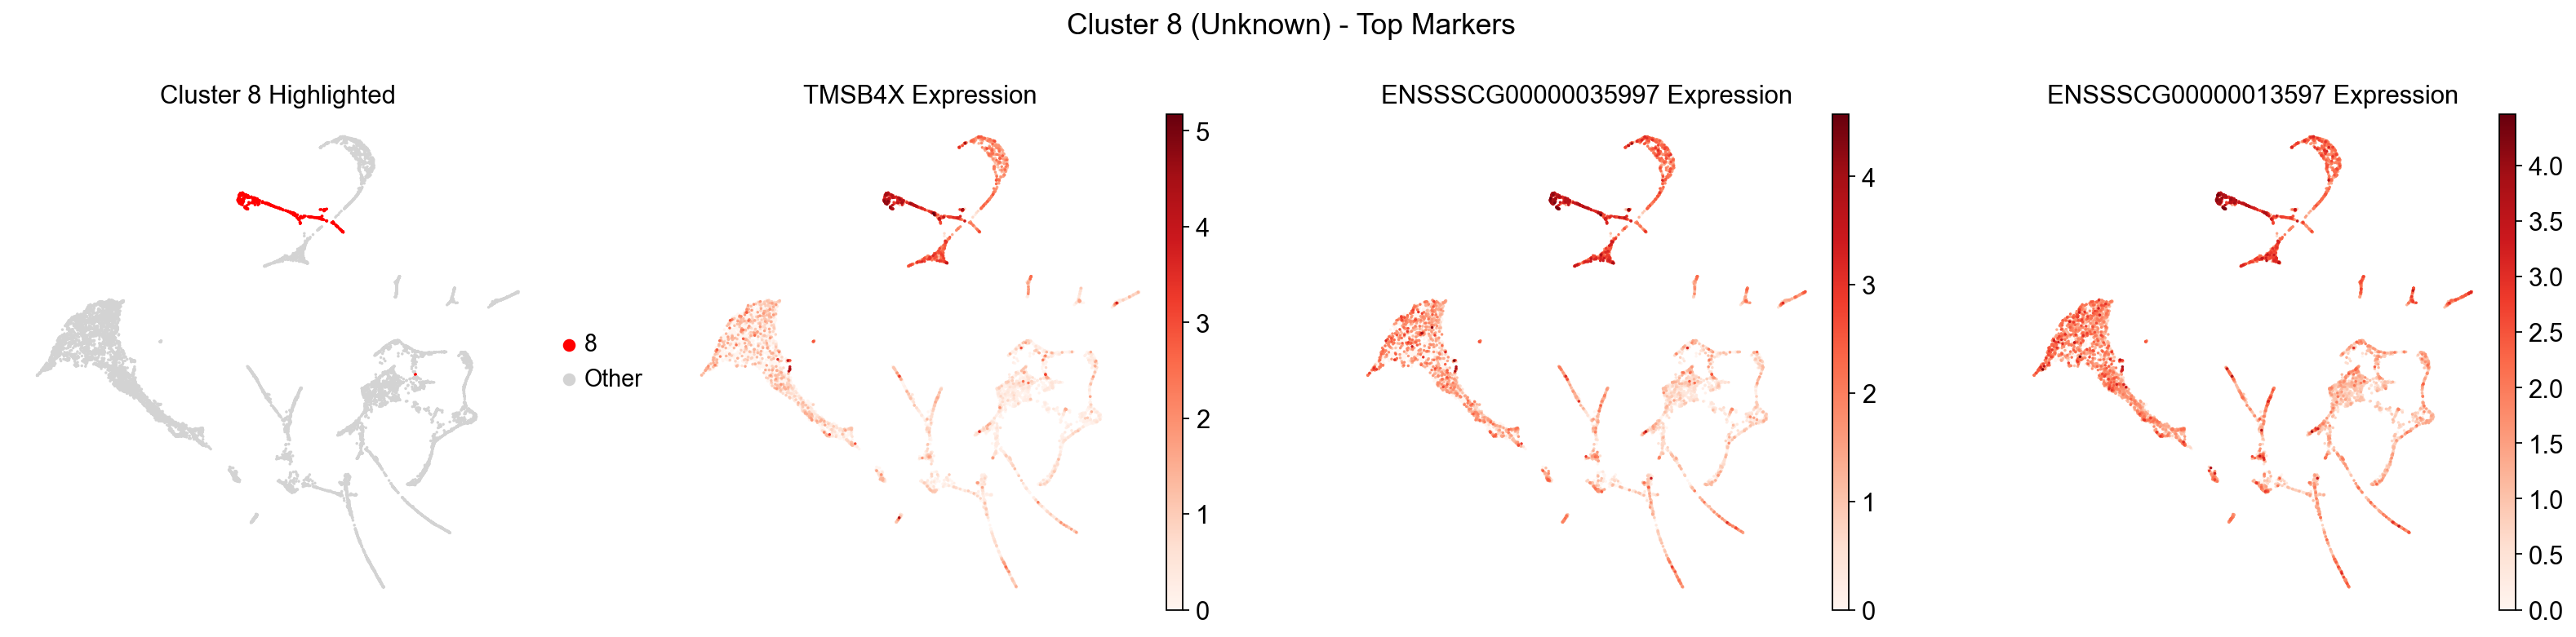

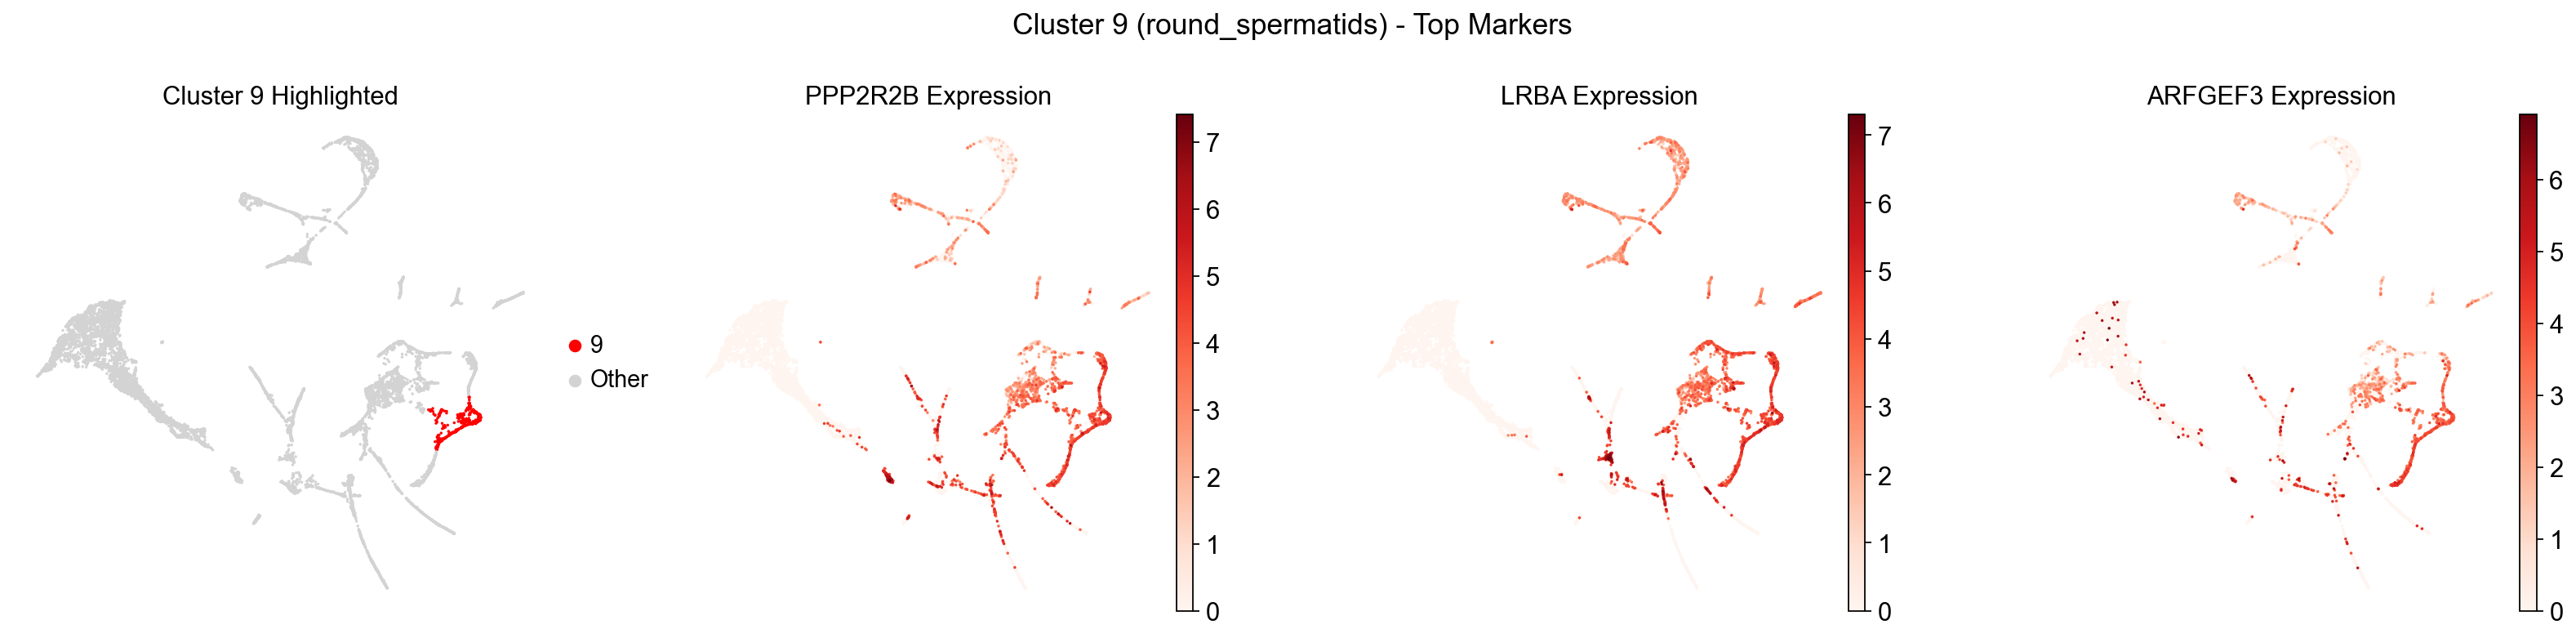

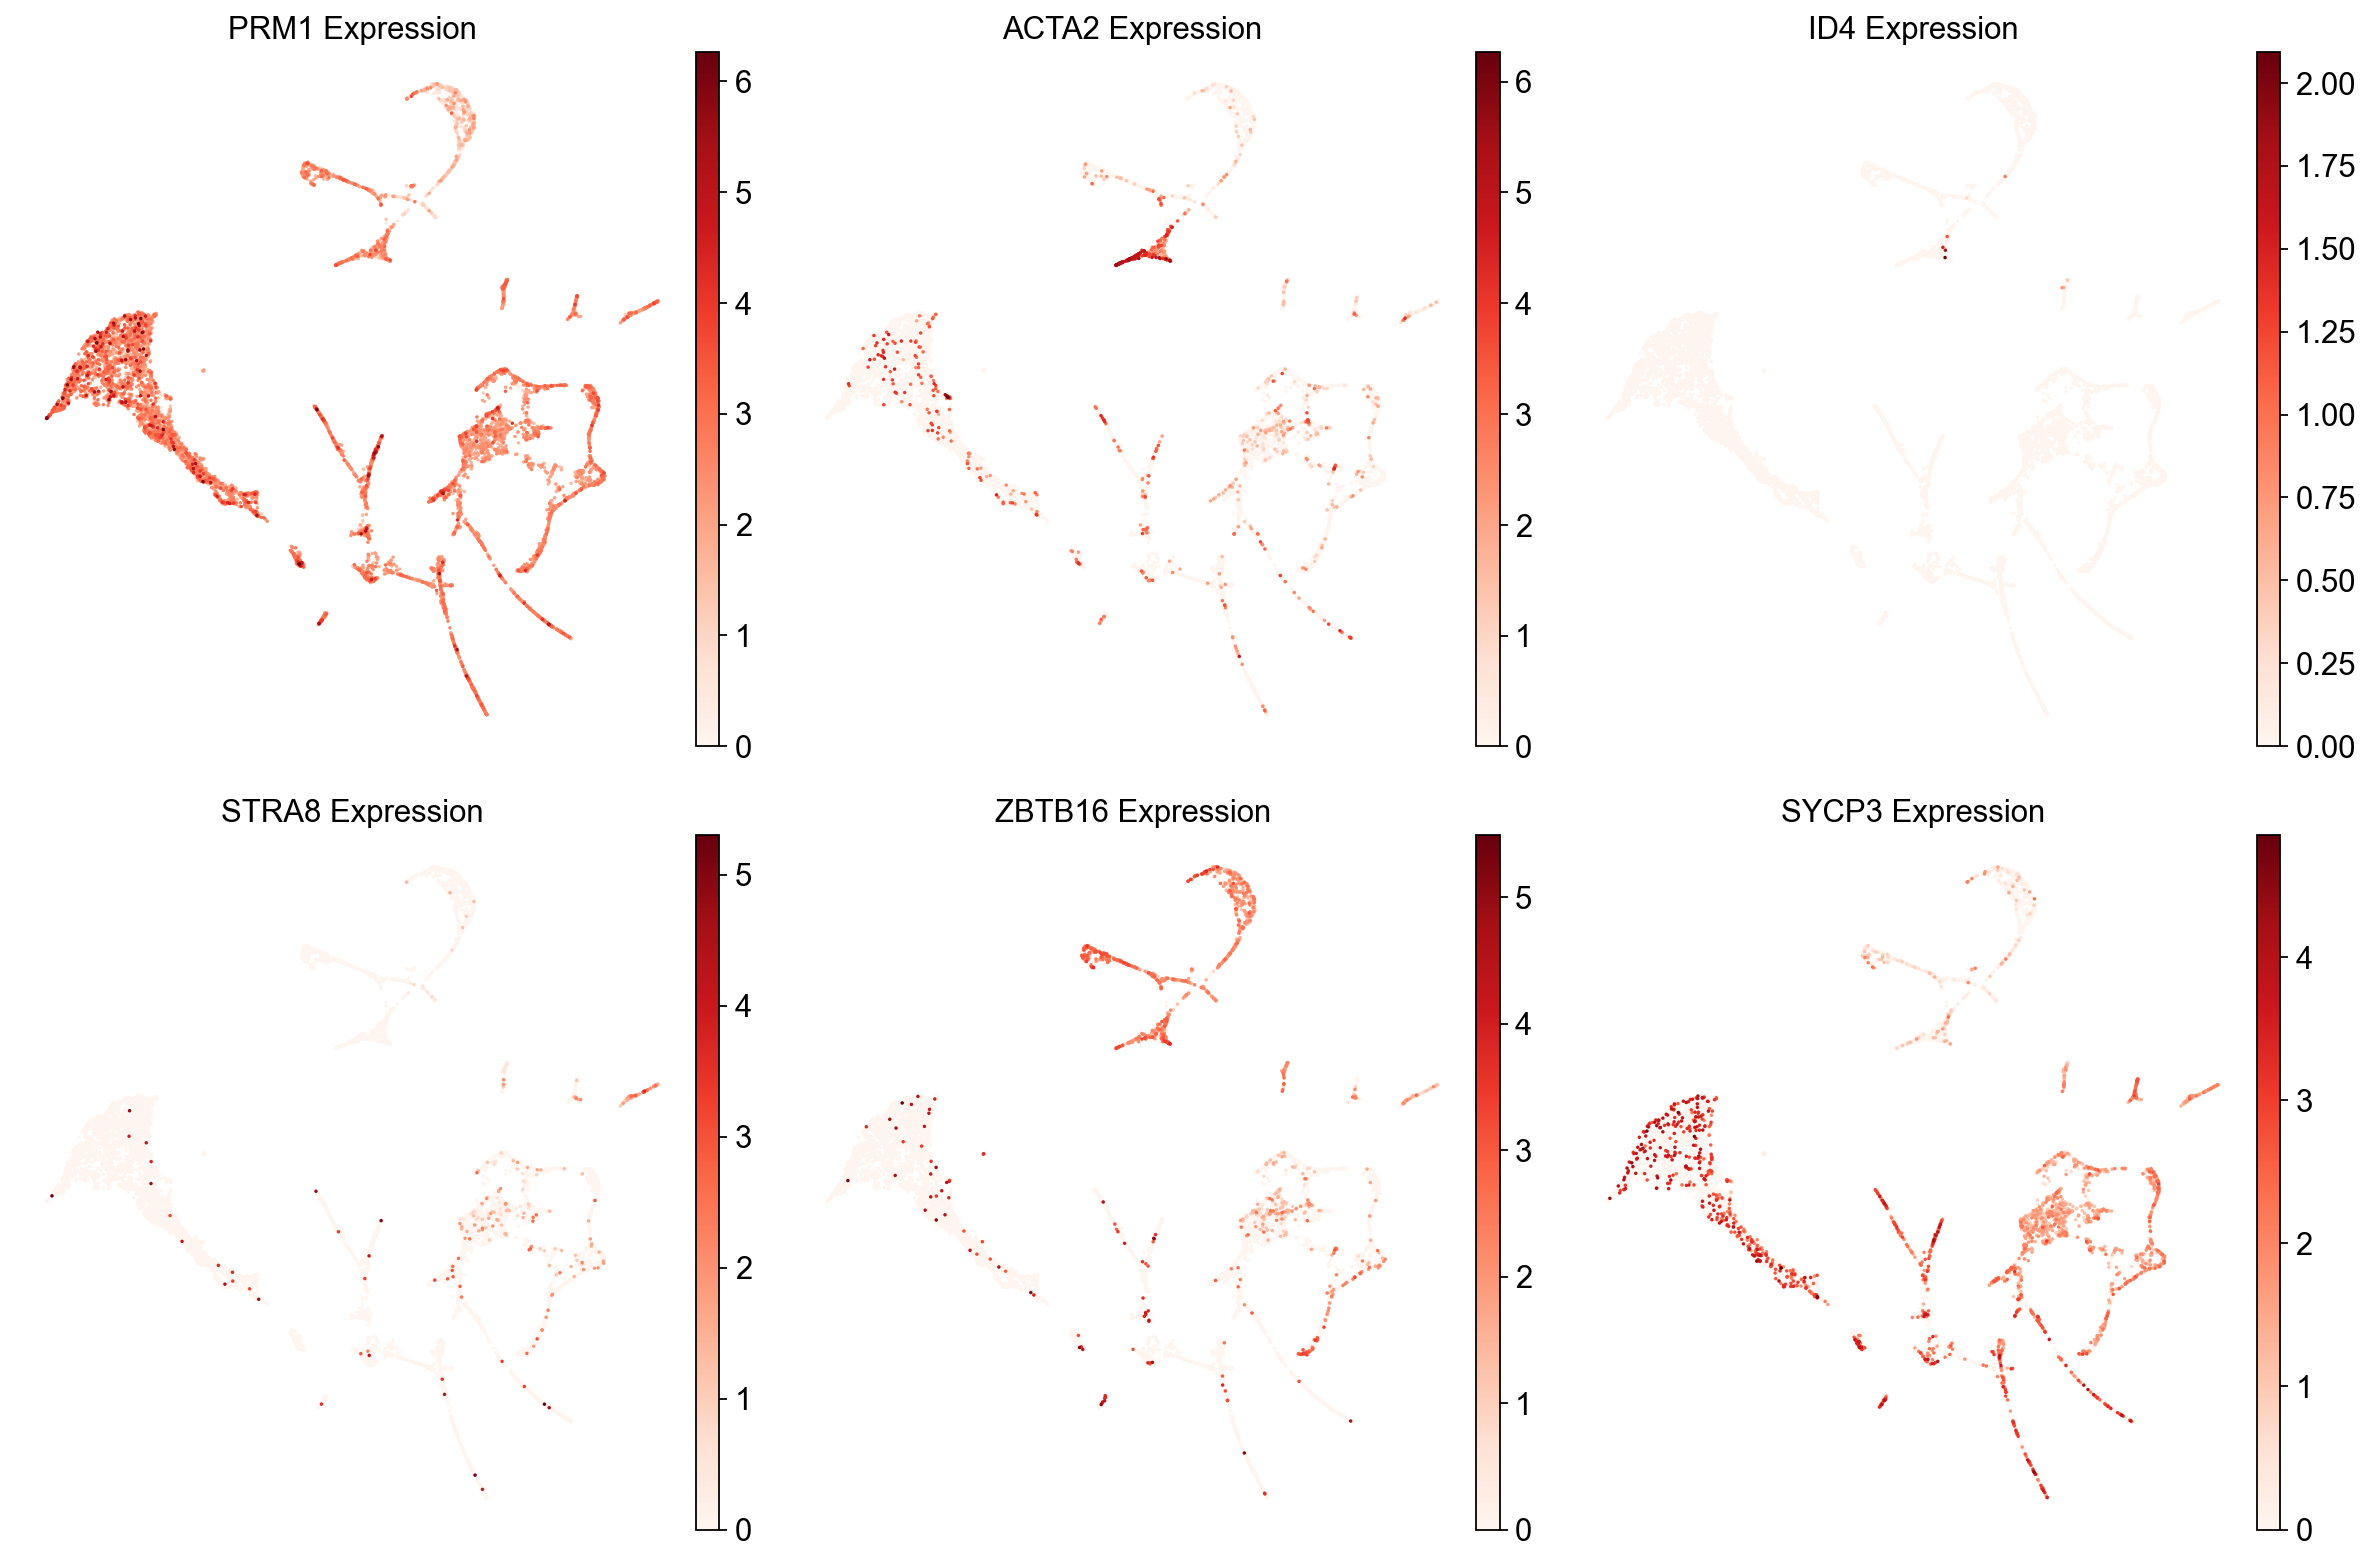

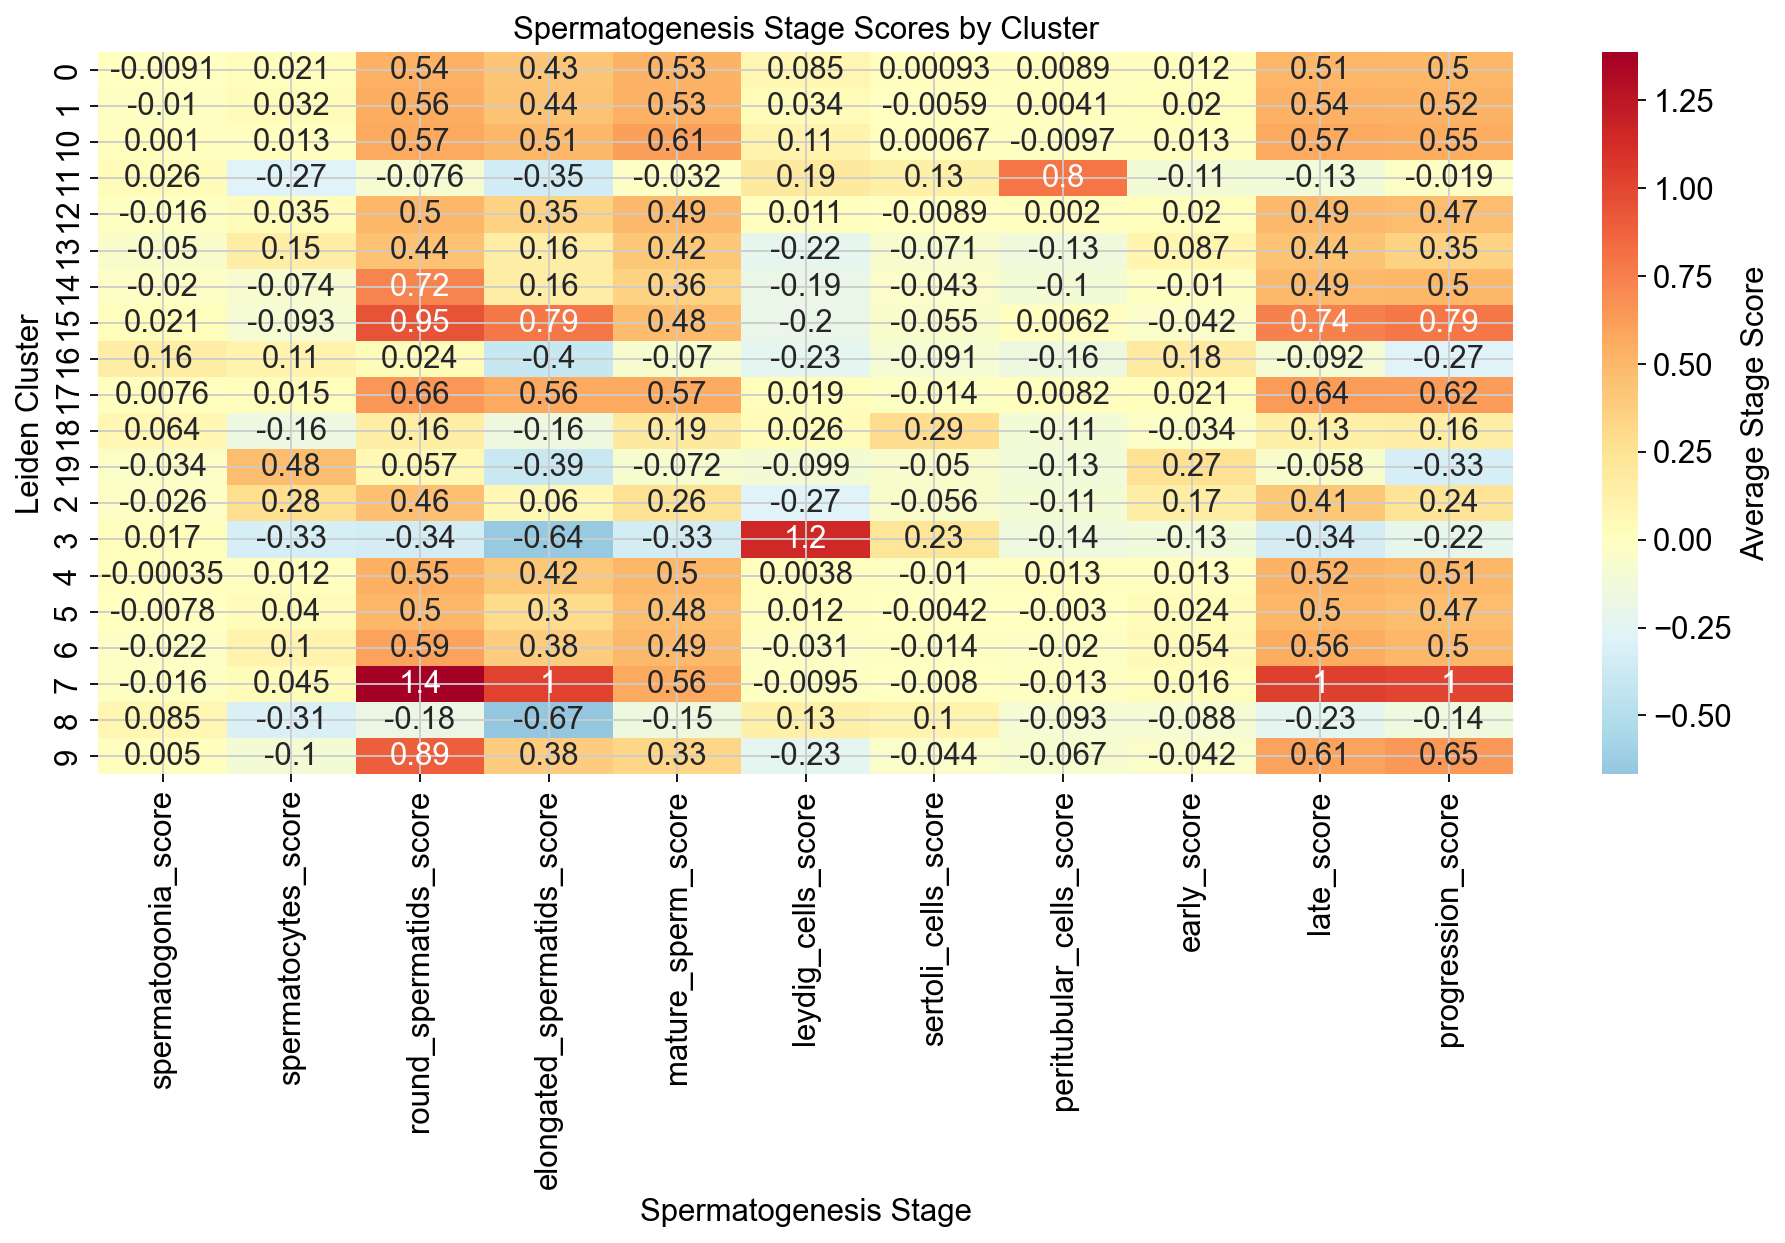

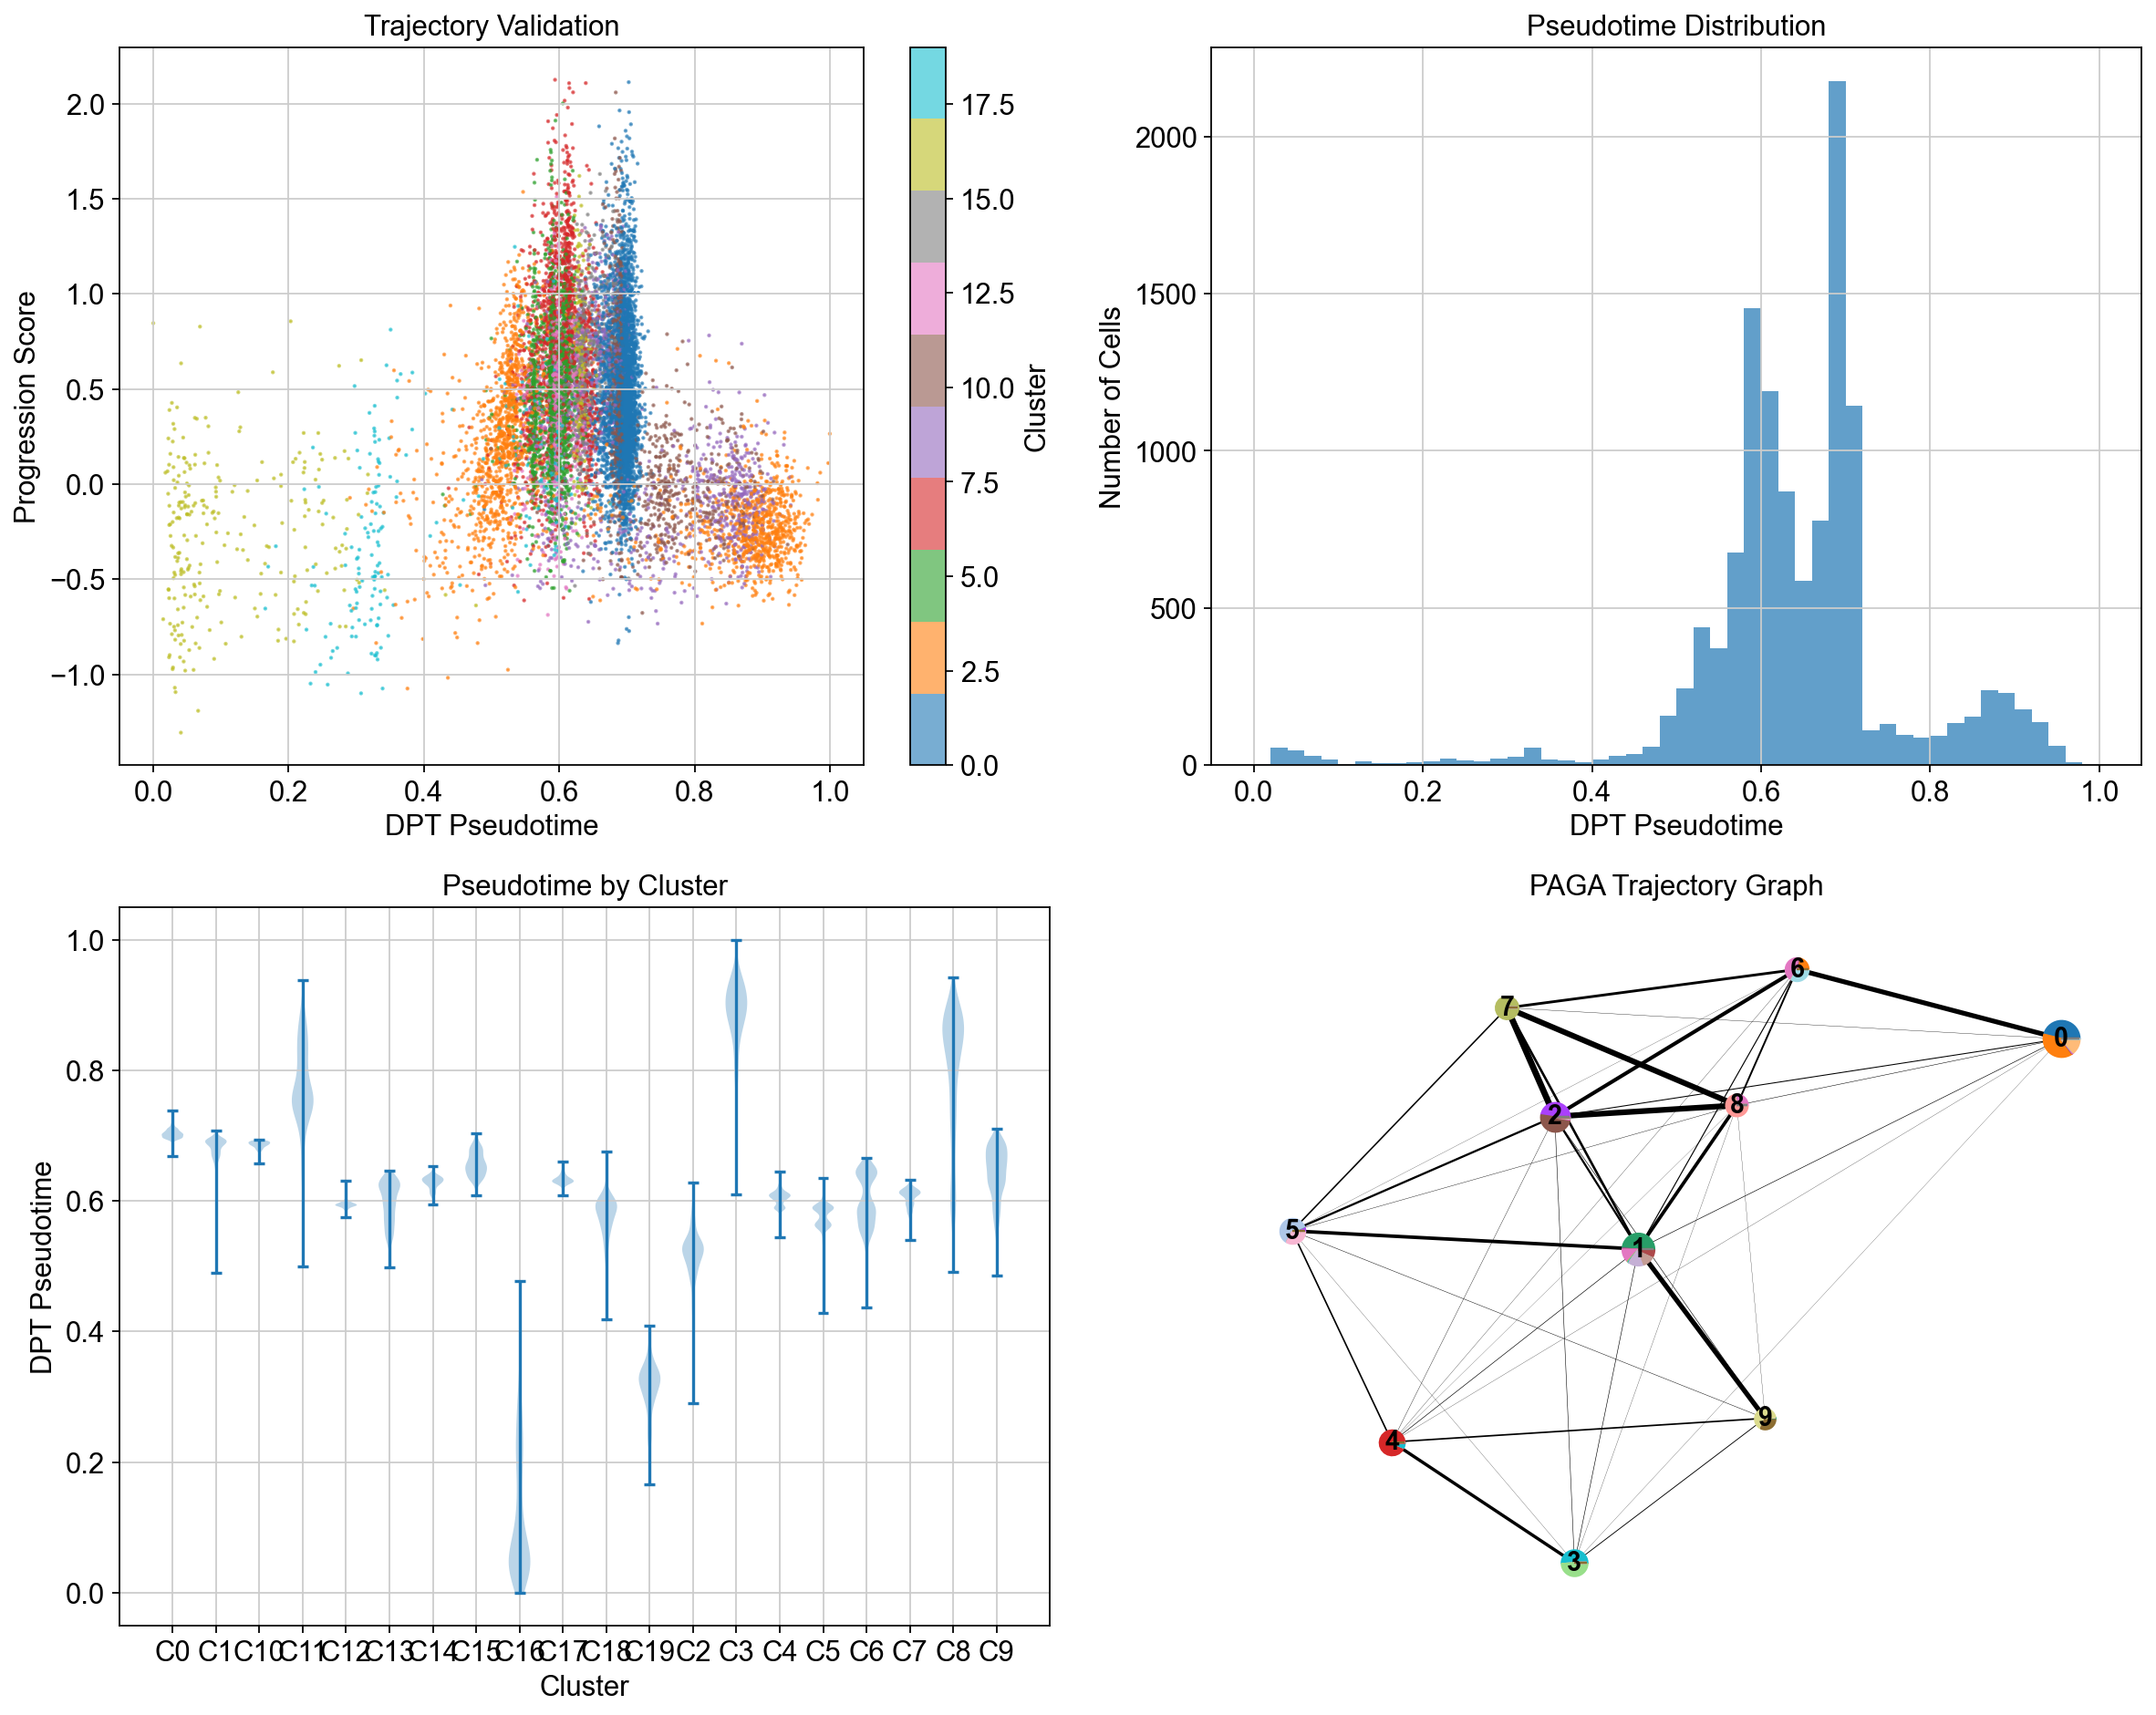


ANALYSIS SUMMARY
Final data: 12315 cells × 22040 features
Clusters identified: 20
Annotated clusters: 20
Pseudotime range: 0.000 - 1.000
GSEA databases: 1


TypeError: export_results() got an unexpected keyword argument 'output_dir'

In [3]:
#adata = sc.read_h5ad("decontx_trimmed_gex.h5ad")
an = SpermatogenesisAnalyzer(data_path='/Users/oskarhaupt/Documents/DE/2024_FU-Bachelor/WS-24-25/Charité/05_sorted/11_decontX/12_decontX_results_no_clusters/decontx_trimmed_gex.h5ad')
adata = an.run_complete_analysis()
an.export_results(output_dir='21_GSEA_decontX_no_clusters')